In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.pandas.set_option('display.max_columns',None)

# EDA

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
top_null = df.isnull().sum().sort_values(ascending=False)
print(top_null)
print(type(top_null))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
<class 'pandas.core.series.Series'>


In [7]:
top_null = df.isnull().sum().sort_values(ascending=False).head(10)
print(top_null)
print(top_null.index)
print(type(top_null.index))
print(top_null.index.tolist())
print(type(top_null.index.tolist()))
top_null_array = top_null.index.tolist()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType']
<class 'list'>


# Null with Price

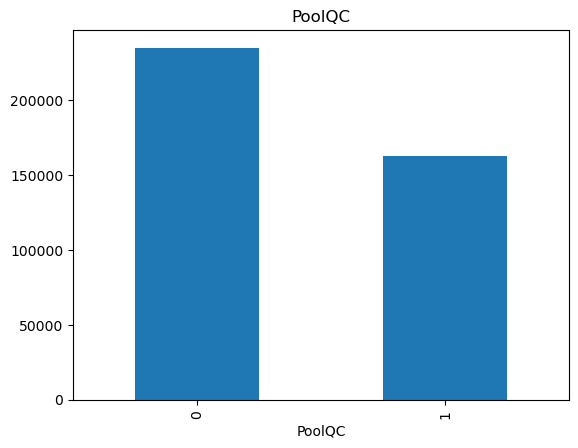

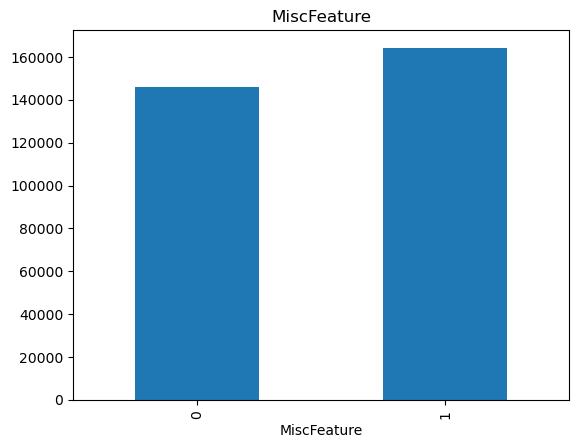

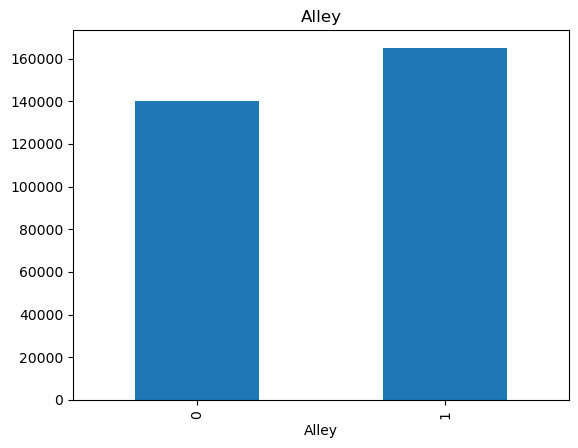

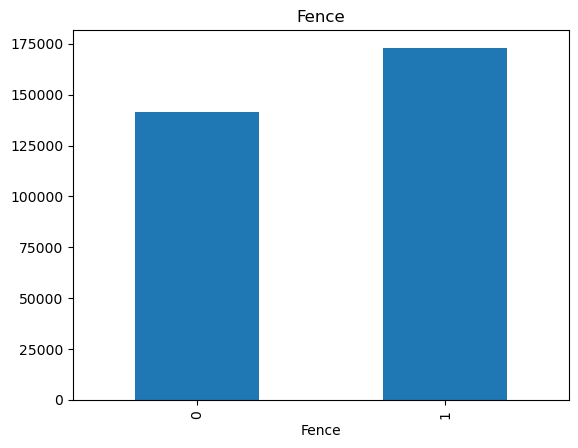

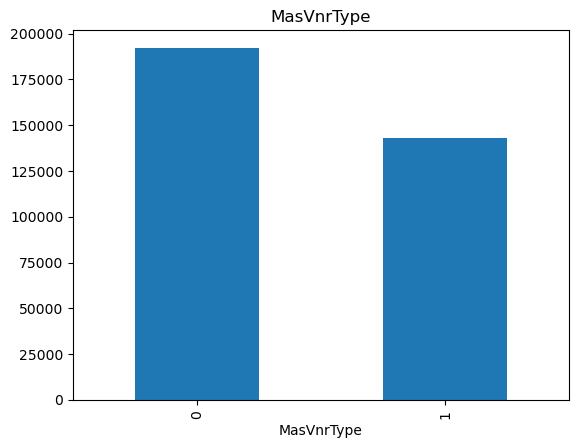

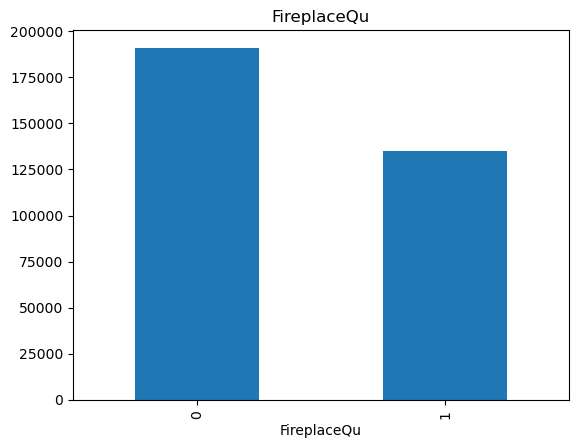

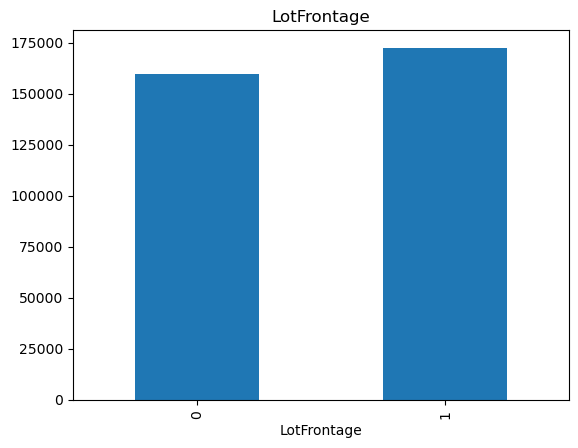

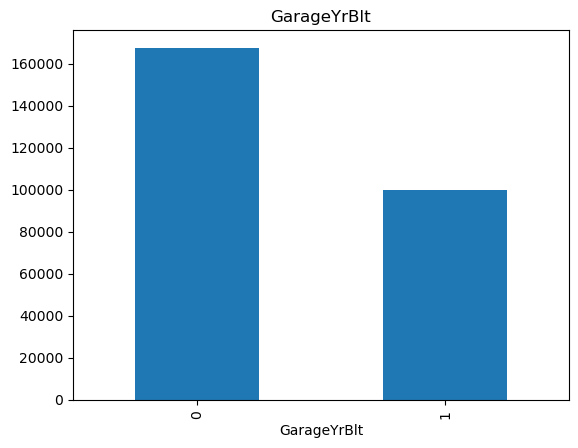

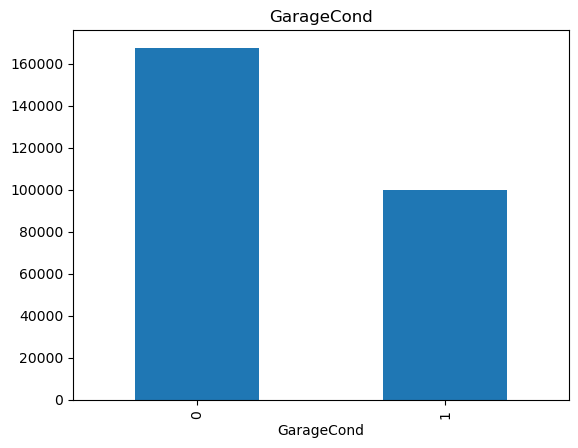

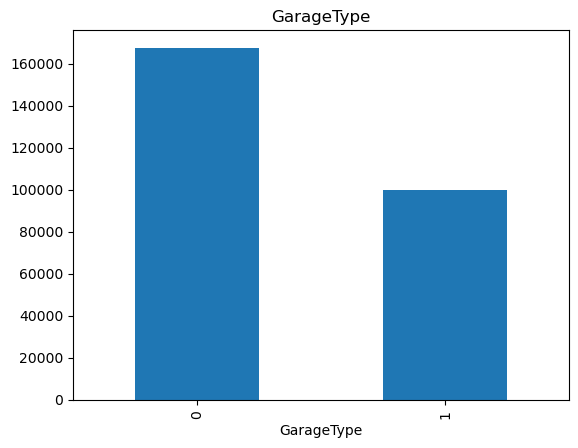

In [8]:
for col in top_null_array:
    df1 = df.copy()
    #print(df1[col])
    # 1 is null
    # 0 is not null
    df1[col] = np.where(df1[col].isnull(),1,0)
    df1.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()


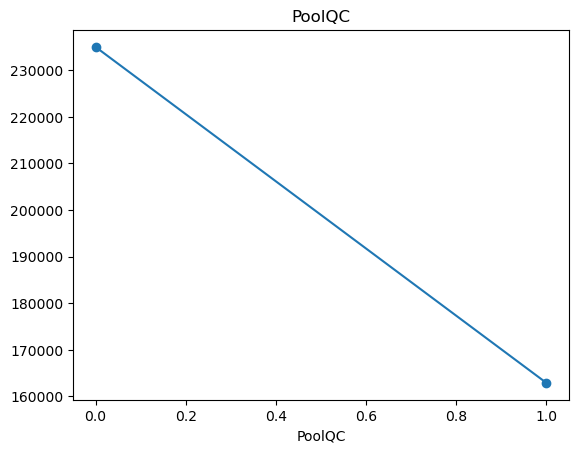

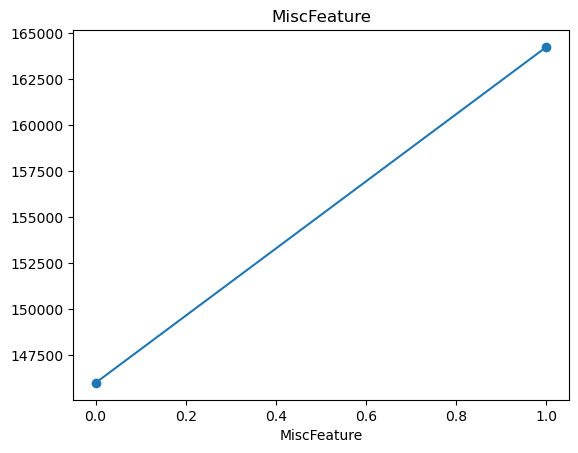

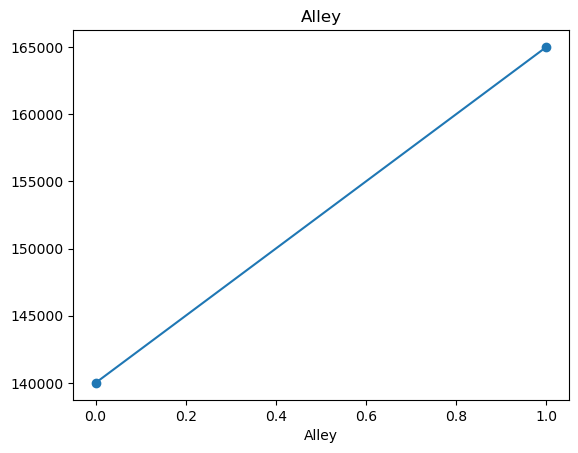

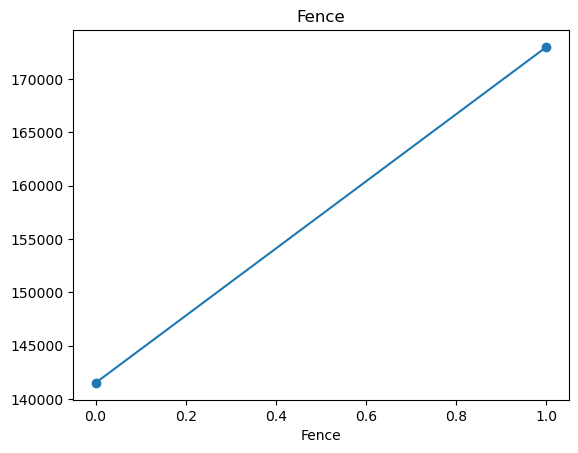

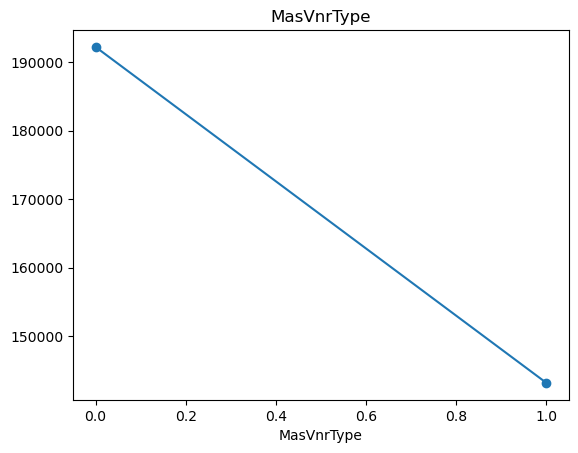

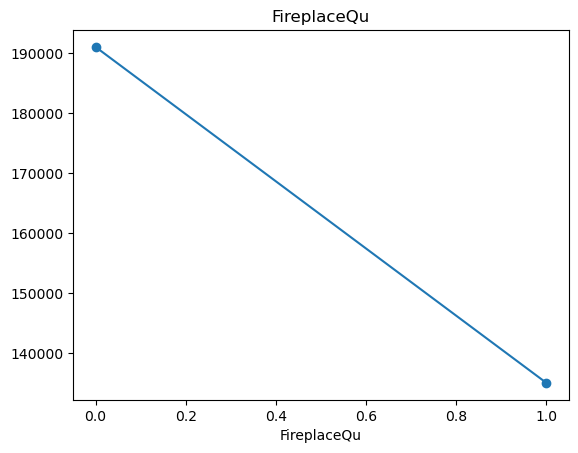

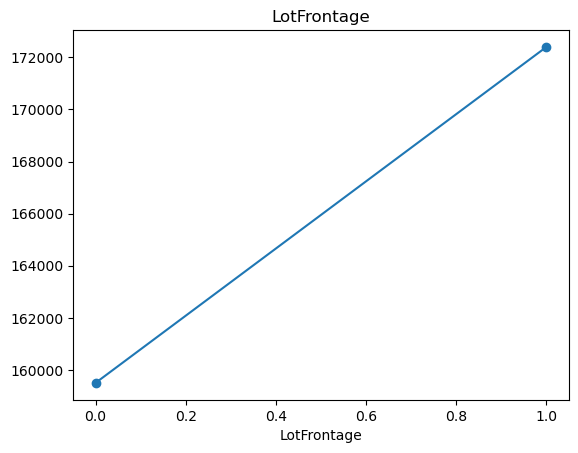

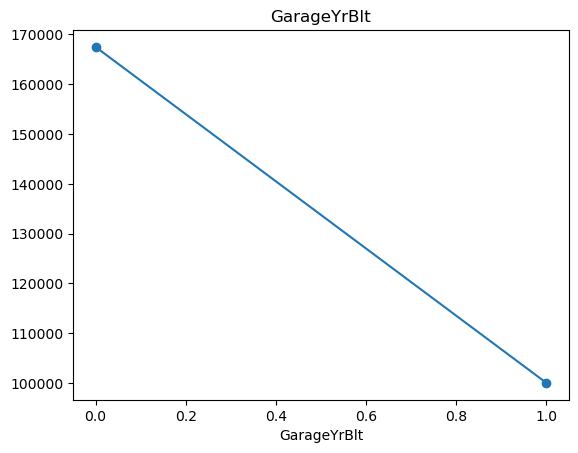

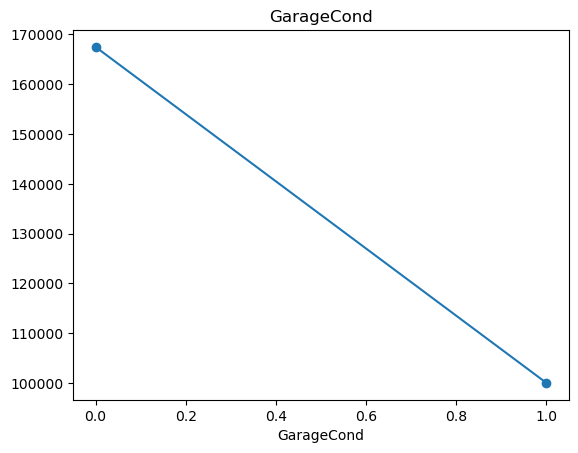

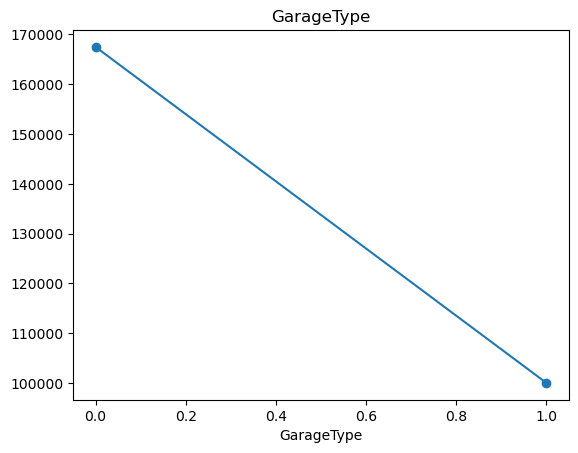

In [9]:
for col in top_null_array:
    df1 = df.copy()
    #print(df1[col])
    # 1 is null
    # 0 is not null
    df1[col] = np.where(df1[col].isnull(),1,0)
    df1.groupby(col)['SalePrice'].median().plot(marker='o', linestyle='-')
    plt.title(col)
    plt.show()


In [10]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df2 = df1.drop('Id',axis=1)

In [13]:
df2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Numeric

In [14]:
numeric_col = []

for col in df2.columns:
    if df2[col].dtypes != 'O':
        numeric_col.append(col) 
        
print(len(numeric_col))
print(numeric_col)
print(df2[numeric_col].head())

38
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemod

# Year

In [15]:
year_col = []

for col in numeric_col:
    if 'Year' in col or "Yr" in col:
        year_col.append(col) 
        
print(len(year_col))
print(year_col)
print(df2[year_col].head())

4
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
   YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008


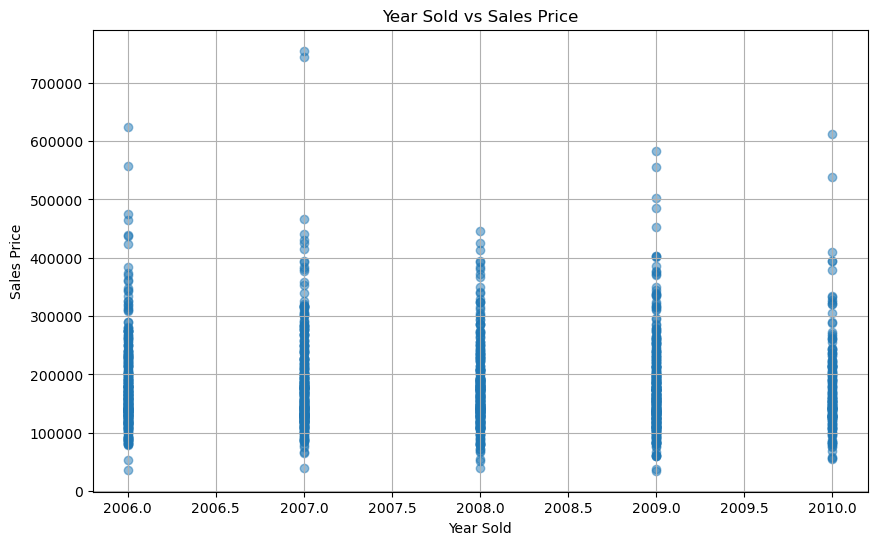

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['YrSold'], df2['SalePrice'], alpha=0.5)
plt.title('Year Sold vs Sales Price')
plt.xlabel('Year Sold')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()


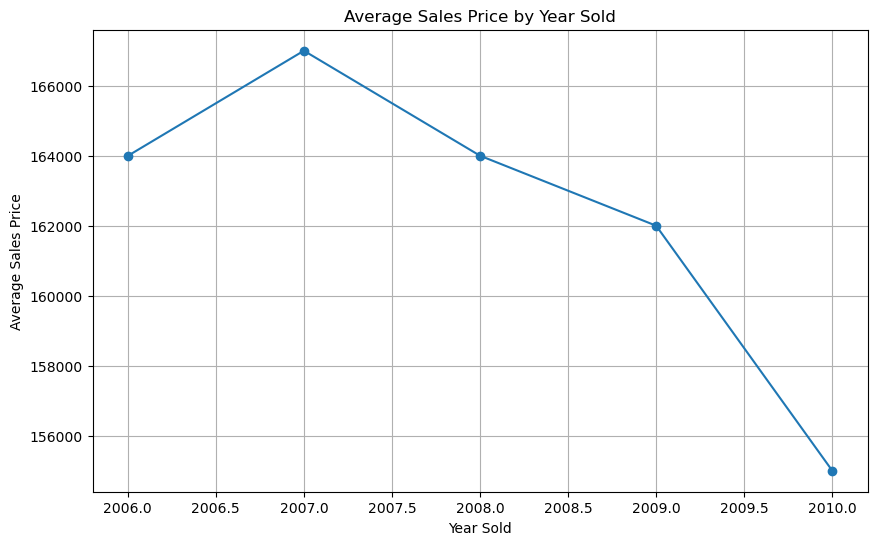

In [17]:
#median because of outliers
#nonsense - it should increase
df1 = df2.copy()
yearly_sales_price = df2.groupby('YrSold')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

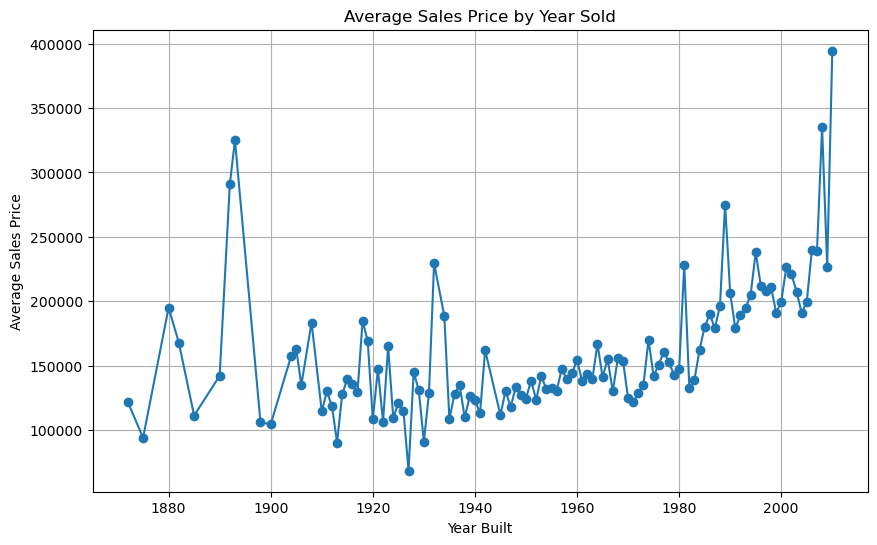

In [18]:
df1 = df2.copy()
yearly_sales_price = df1.groupby('YearBuilt')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('Year Built')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

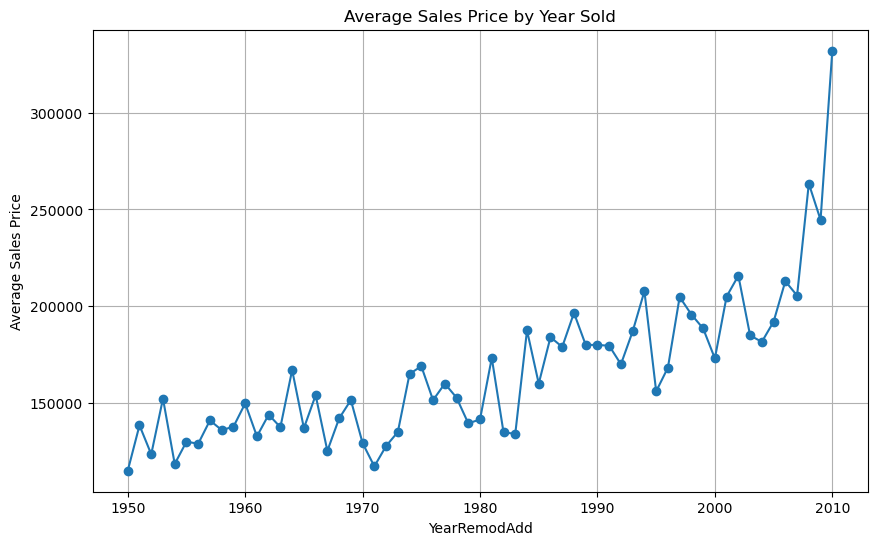

In [19]:
df1 = df2.copy()
yearly_sales_price = df1.groupby('YearRemodAdd')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('YearRemodAdd')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

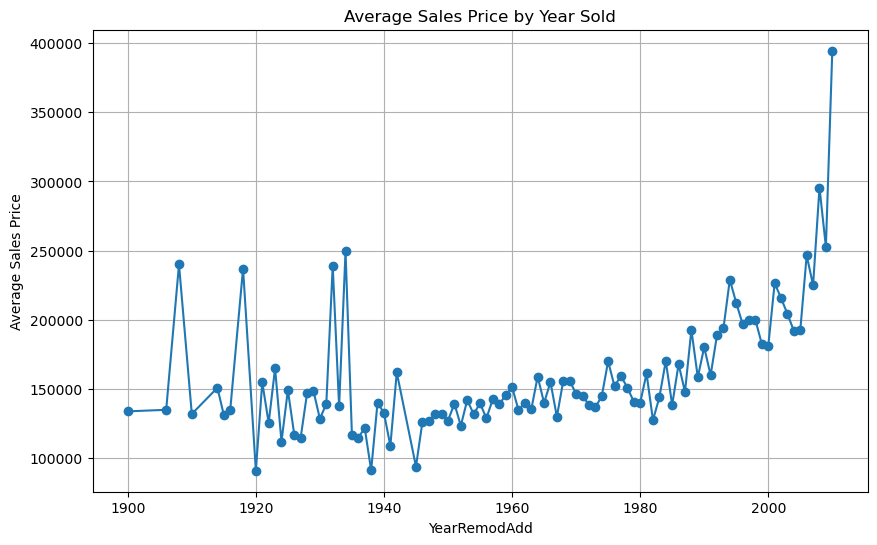

In [20]:
df1 = df2.copy()
yearly_sales_price = df1.groupby('GarageYrBlt')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('YearRemodAdd')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

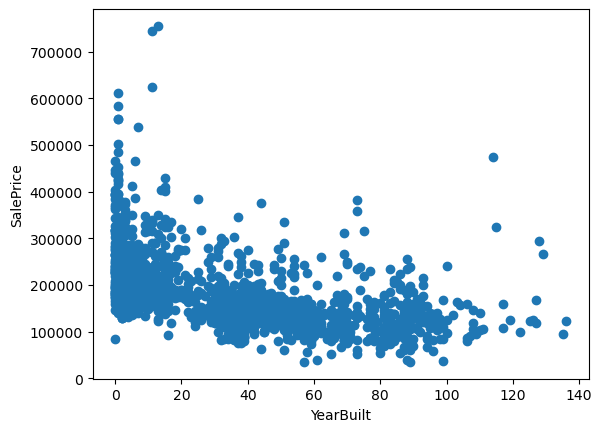

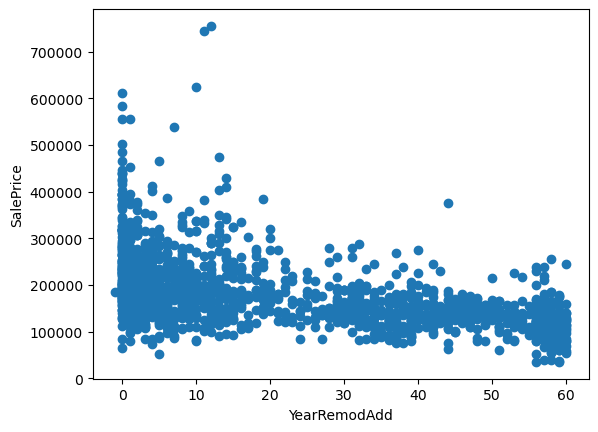

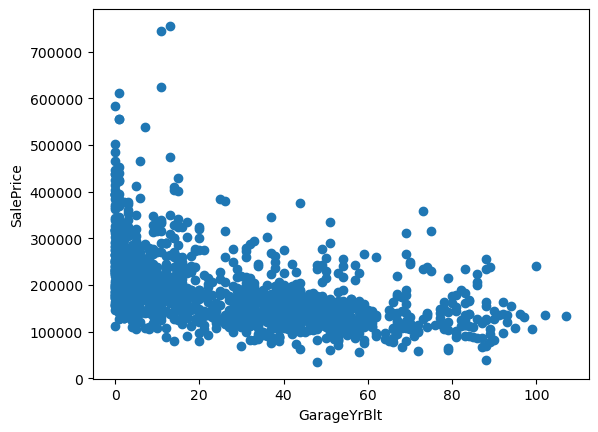

In [21]:

for col in year_col:
    if col!='YrSold':
        df1 = df2.copy()
        df1[col] = df1['YrSold'] - df1[col]
        plt.scatter(df1[col],df1['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()


In [22]:
df2['MSSubClass'].unique

<bound method Series.unique of 0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64>

In [23]:
df2['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

# Discrete under Numeric

In [24]:
discrete_col = []

for col in numeric_col:
    if len(df2[col].unique()) < 25 and col not in year_col:
        discrete_col.append(col) 
        
print(len(discrete_col))
print(discrete_col)
print(df2[discrete_col].head())

18
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
   MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1           

In [25]:
df2.shape

(1460, 80)

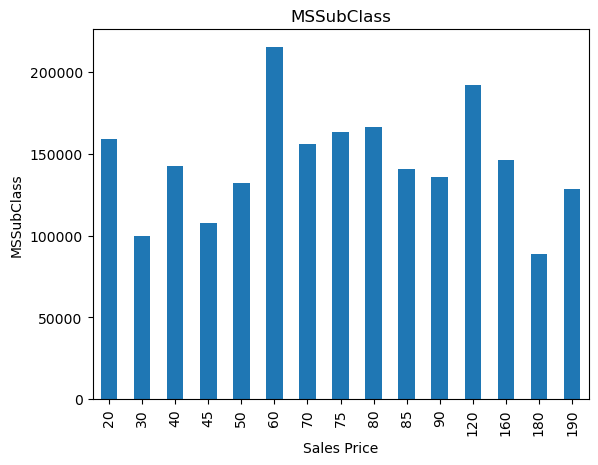

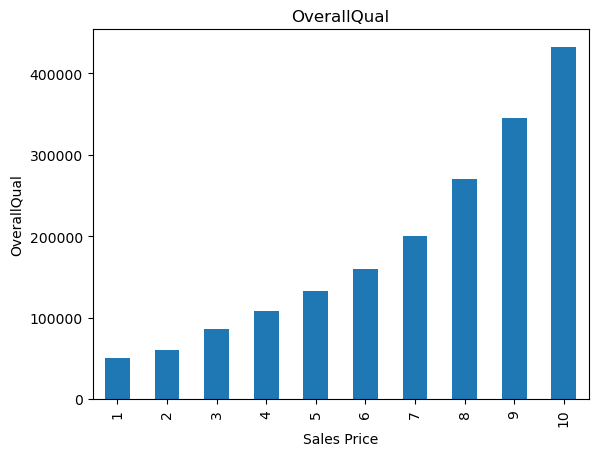

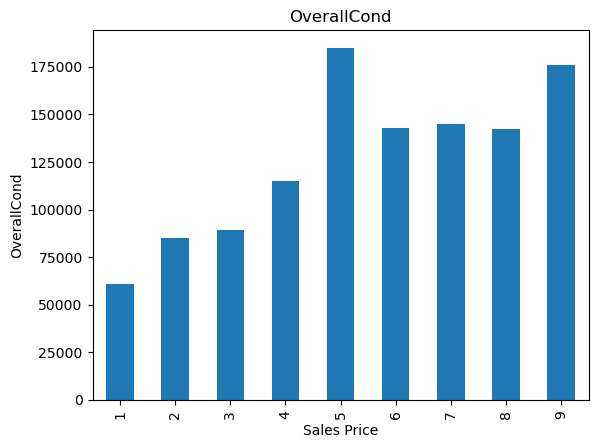

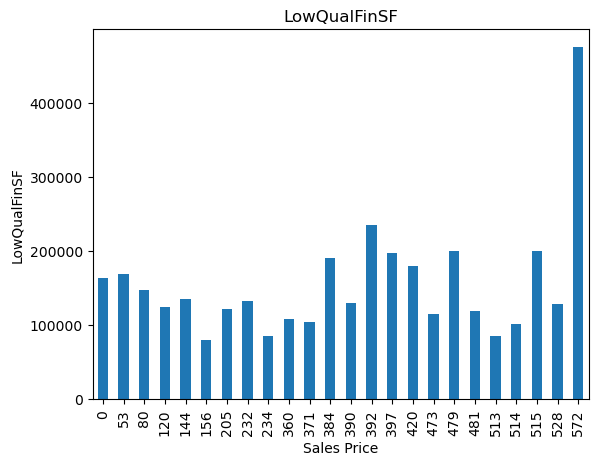

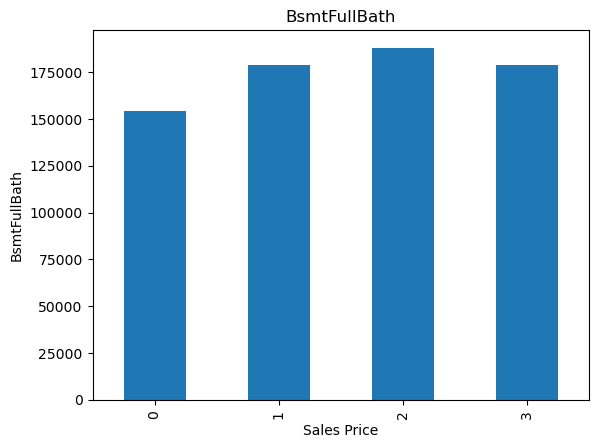

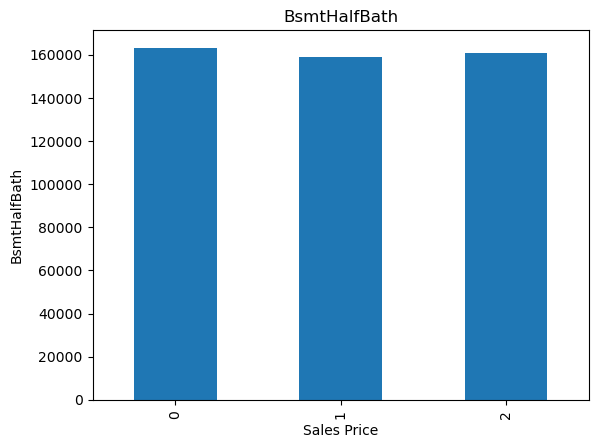

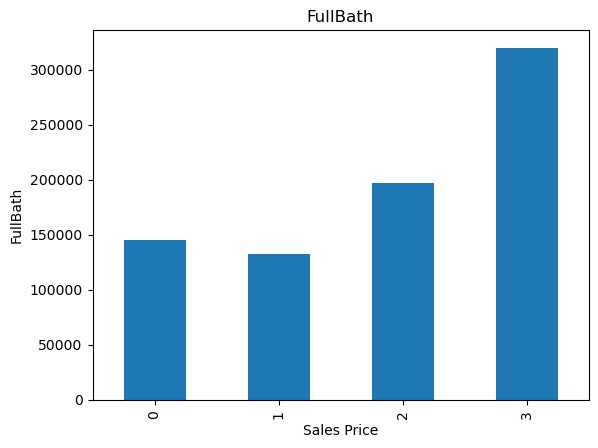

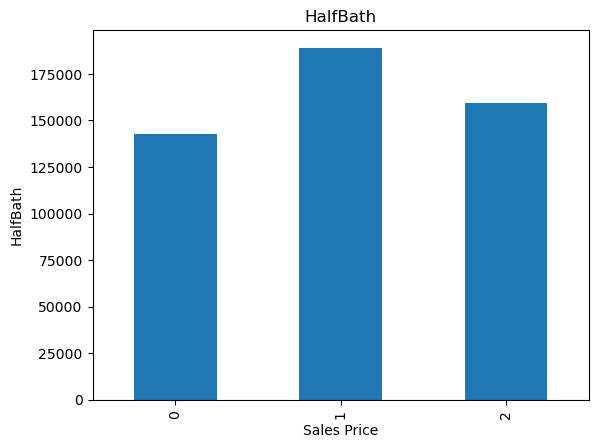

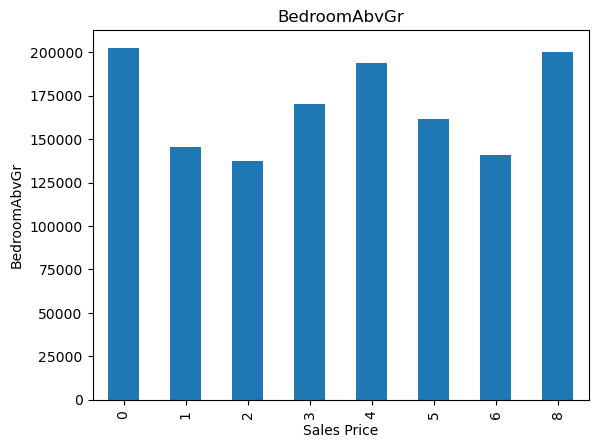

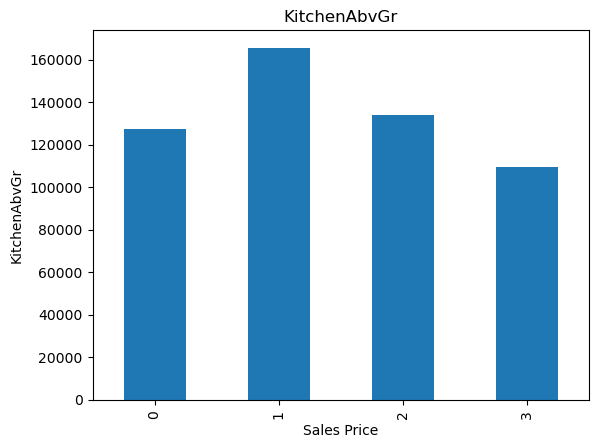

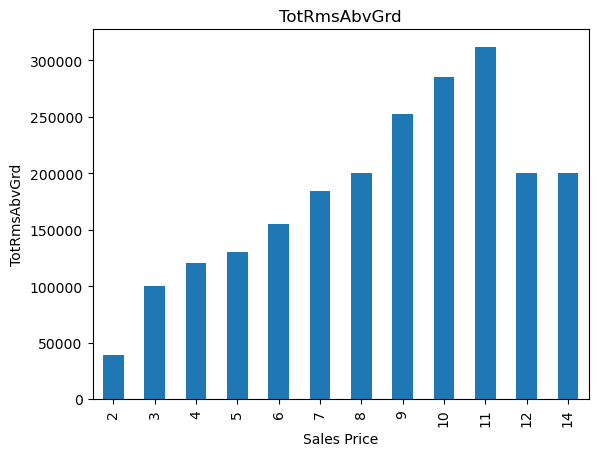

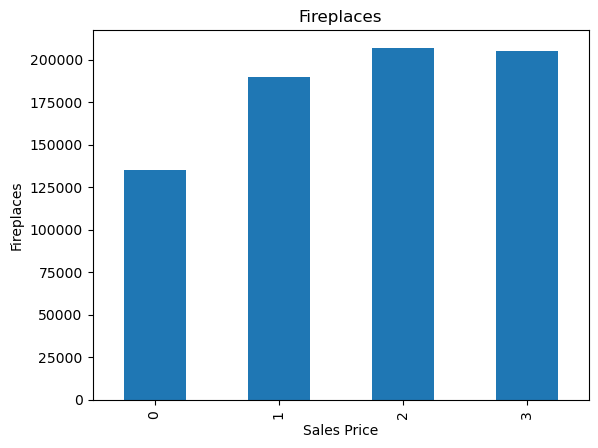

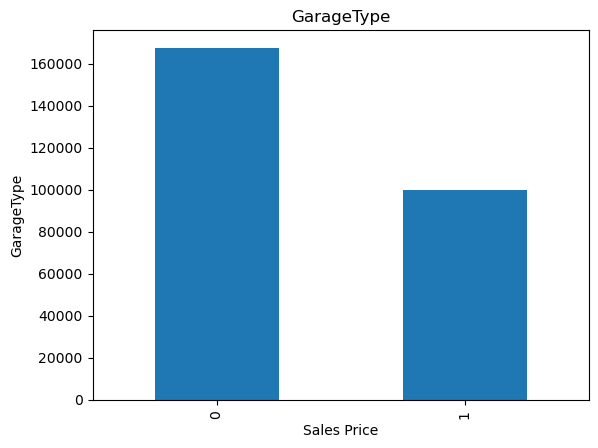

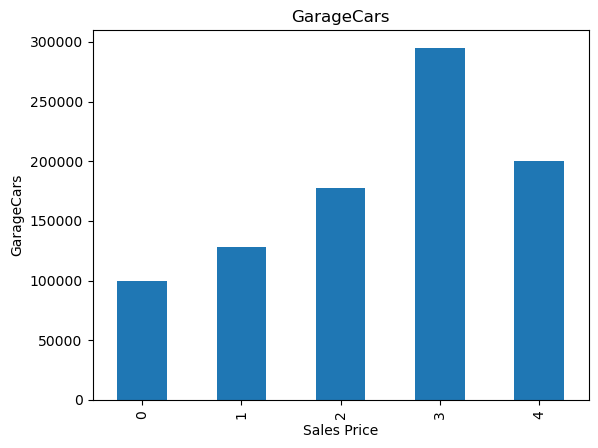

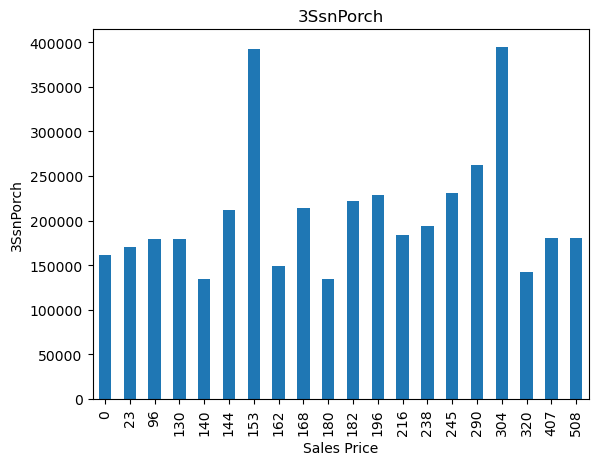

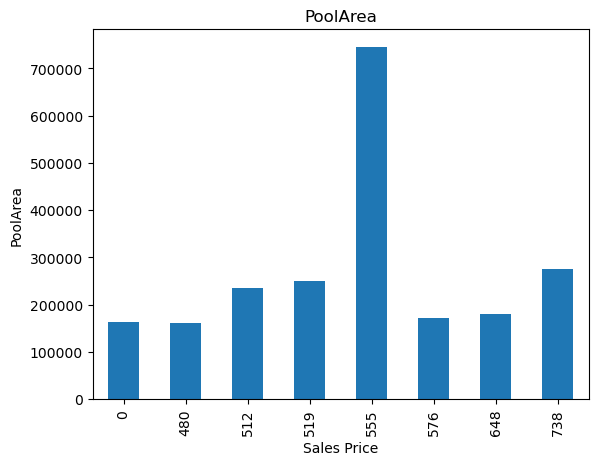

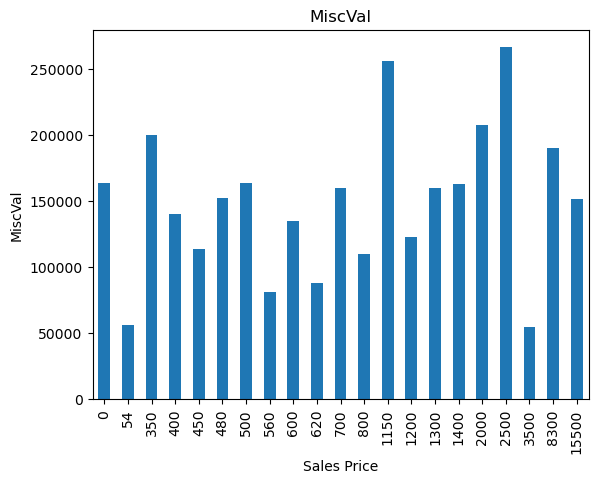

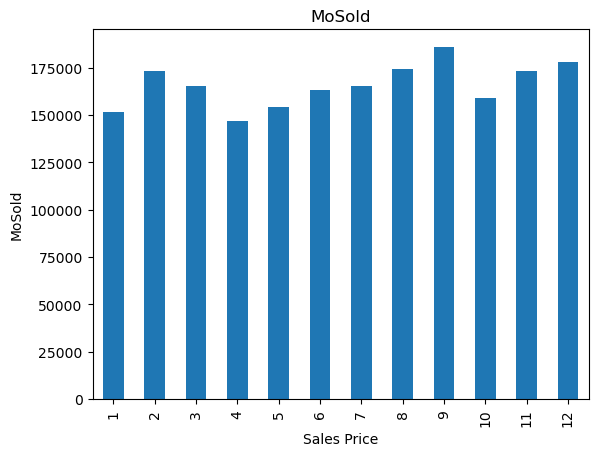

In [26]:
for col in discrete_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel('Sales Price')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# Continuous under Numeric

In [27]:
conti_col = []

for col in numeric_col:
    if len(df2[col].unique()) > 25 and col not in year_col:
        conti_col.append(col) 
        
print(len(conti_col))
print(conti_col)
print(df2[conti_col].head())

16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756    

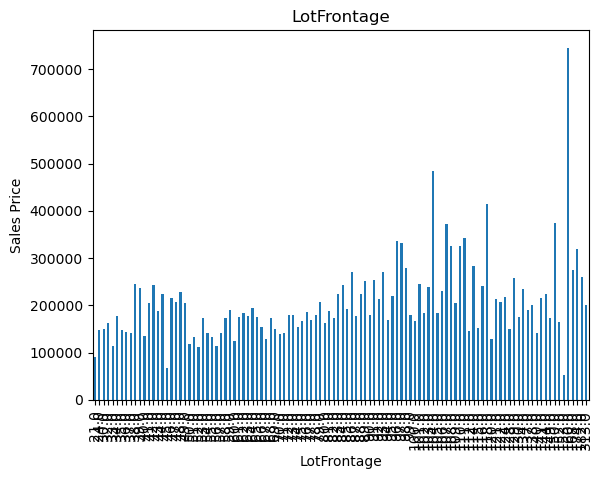

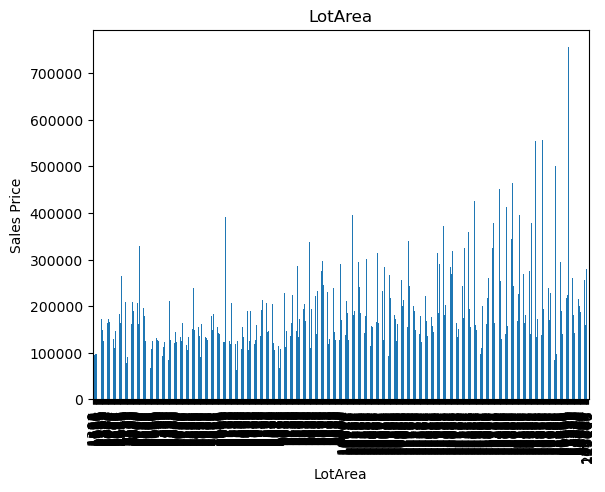

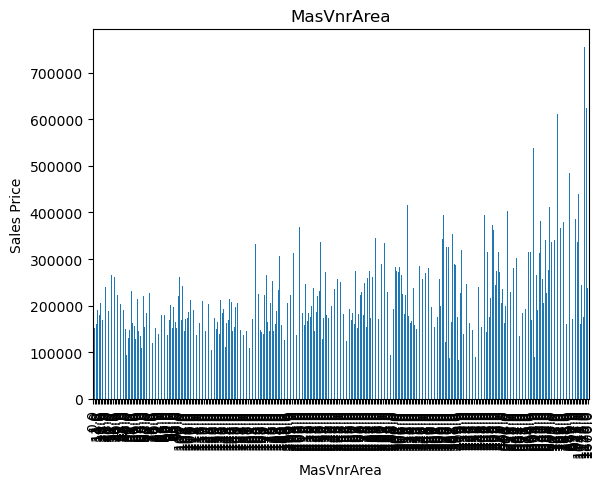

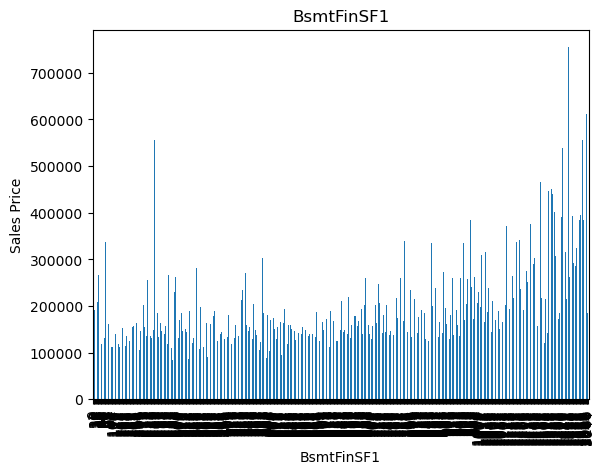

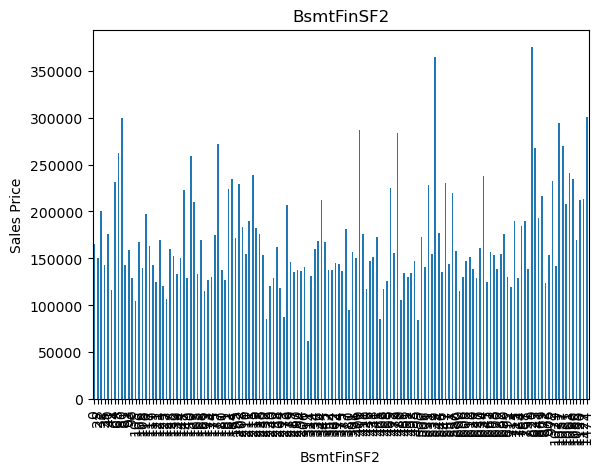

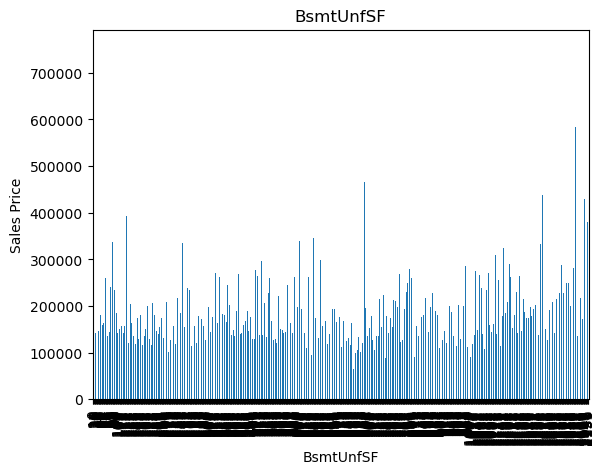

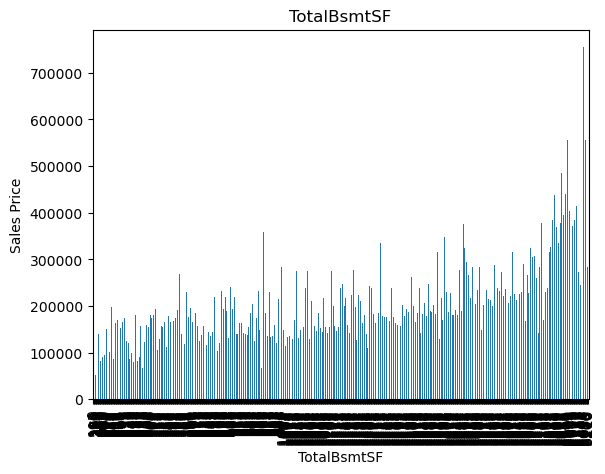

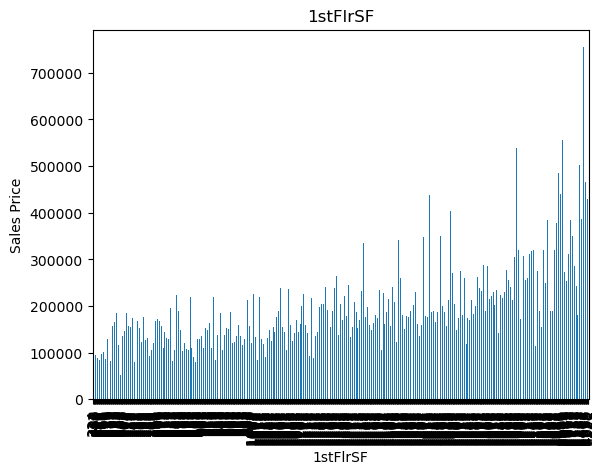

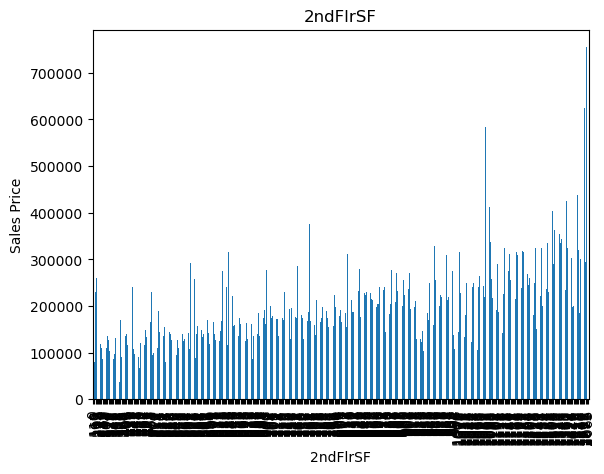

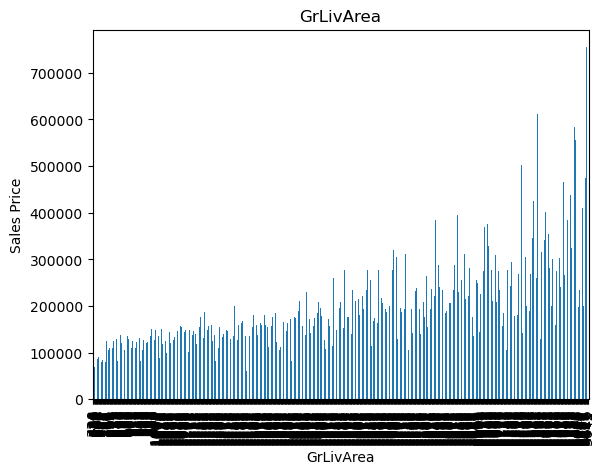

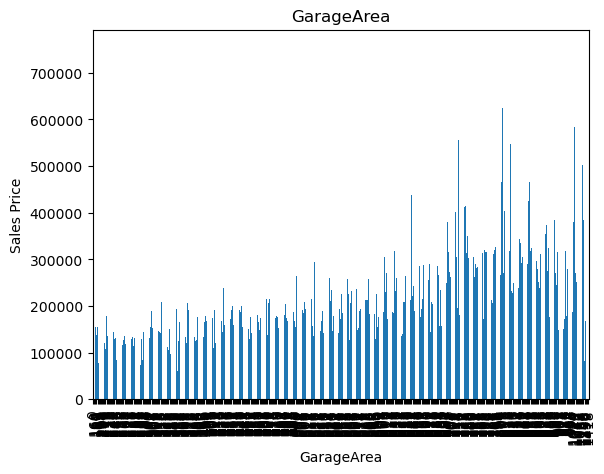

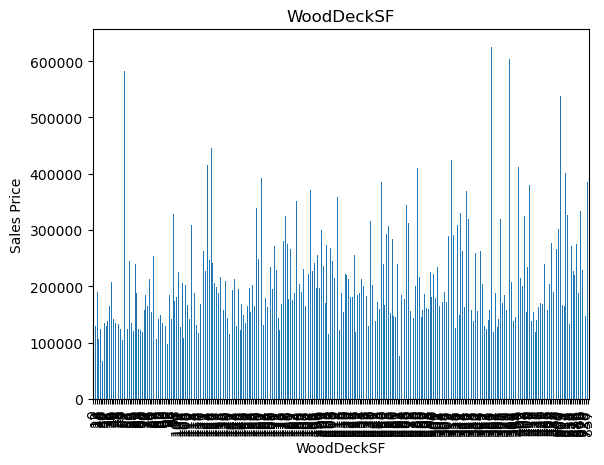

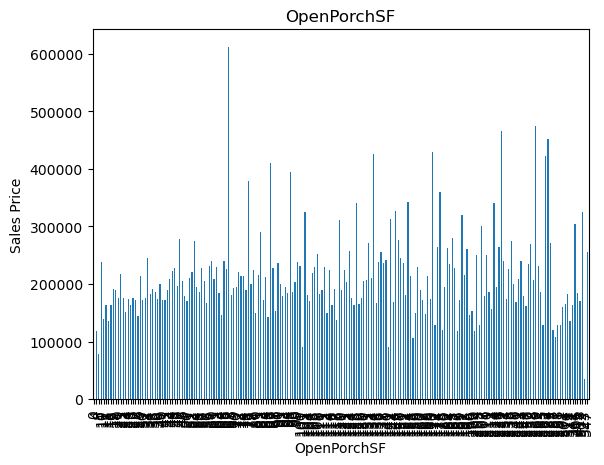

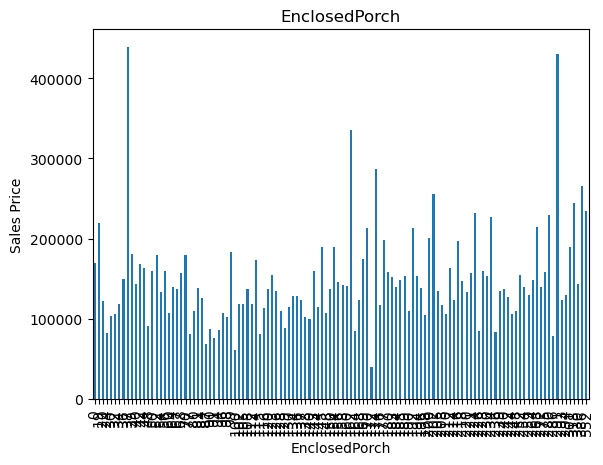

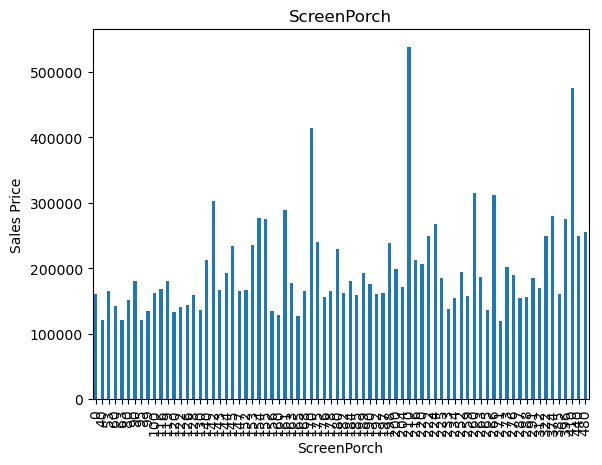

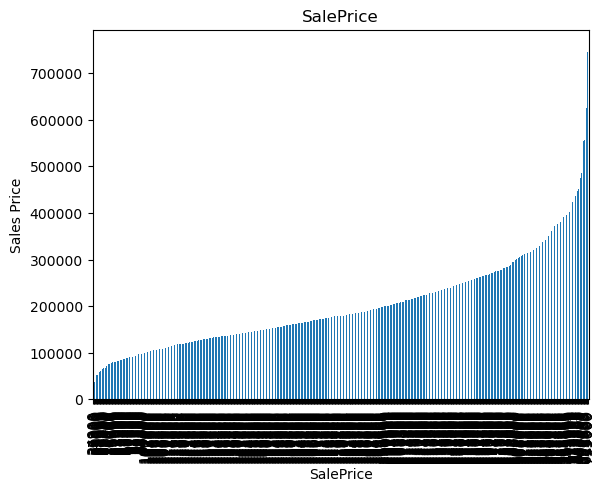

In [28]:
#no bar
#its continuos

for col in conti_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar()
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

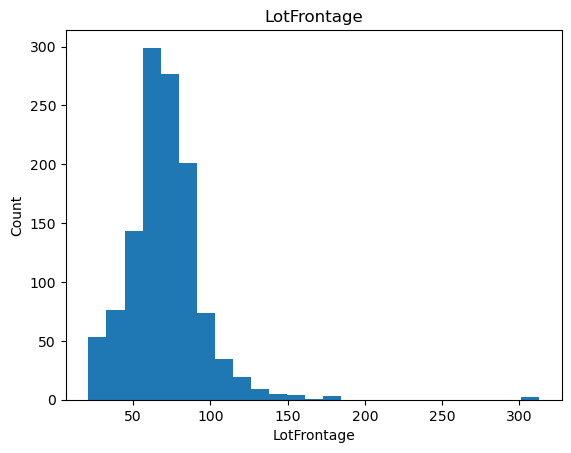

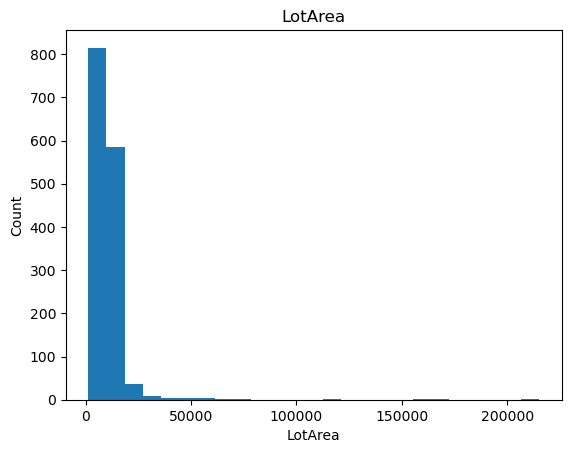

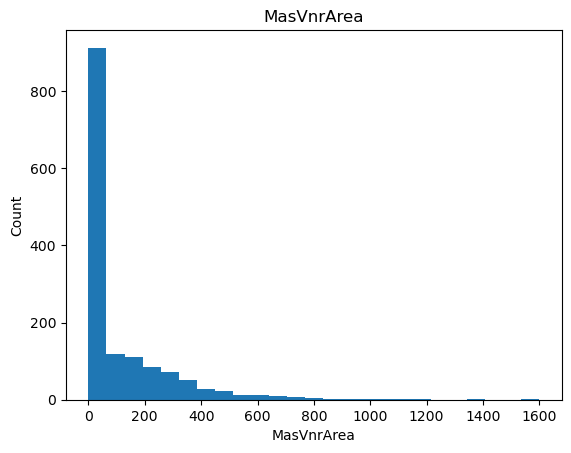

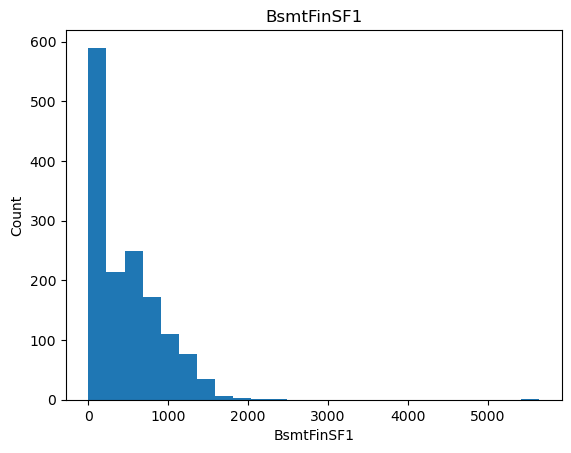

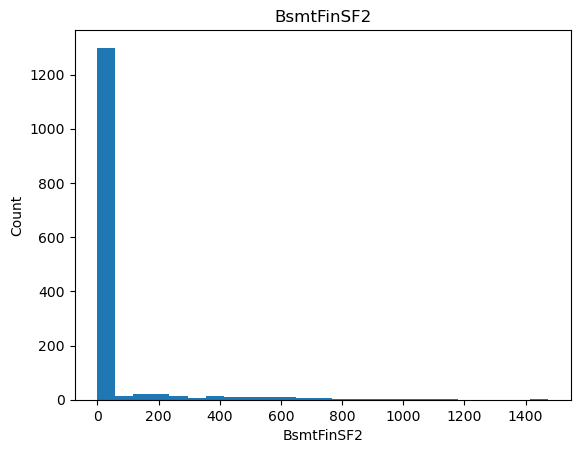

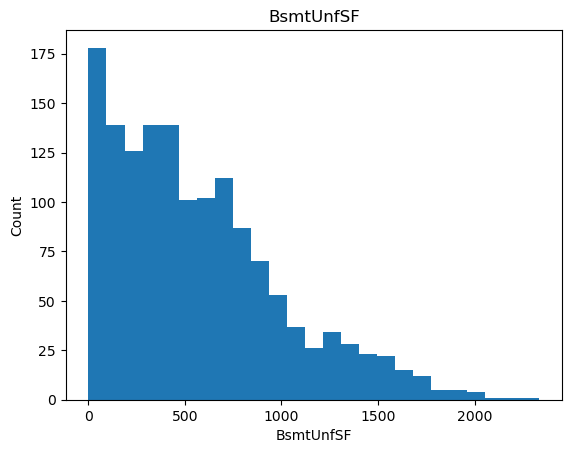

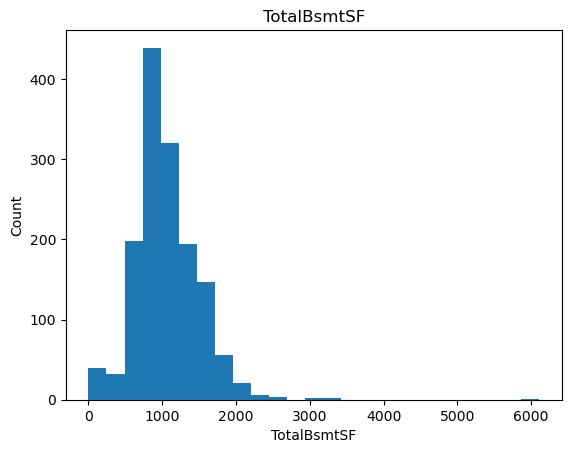

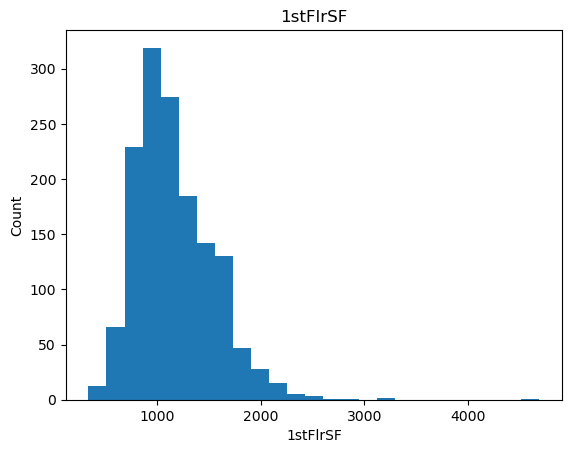

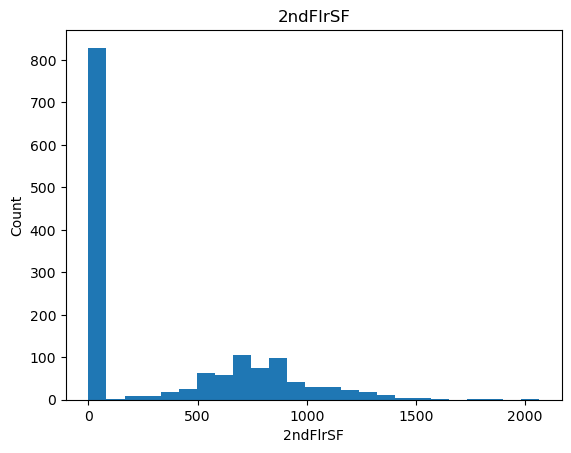

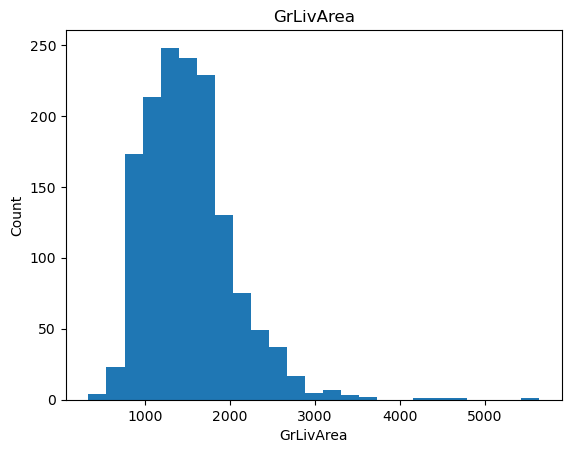

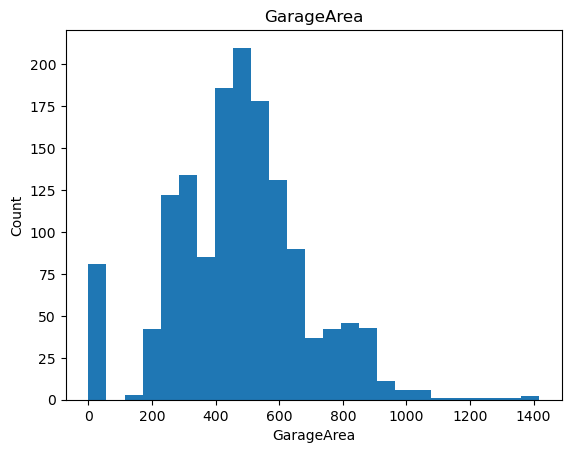

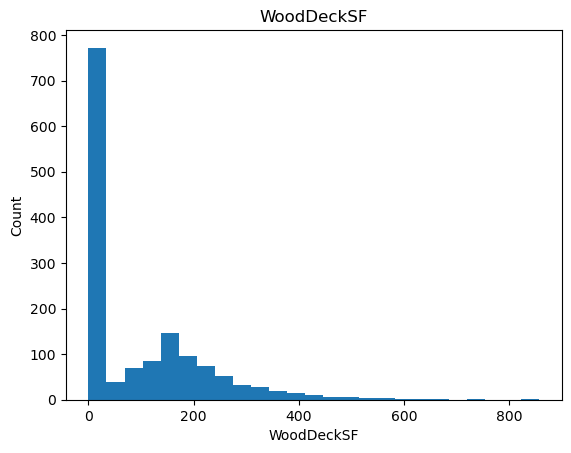

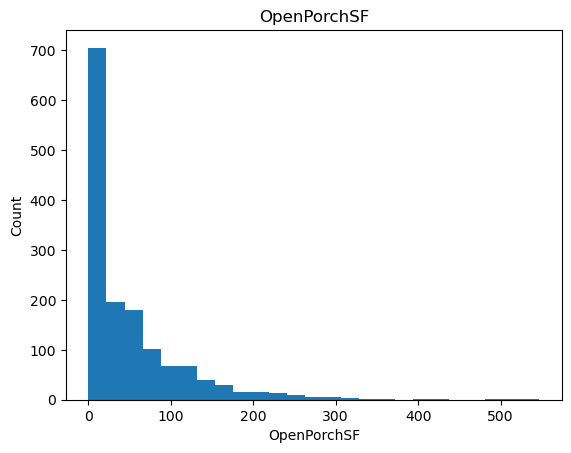

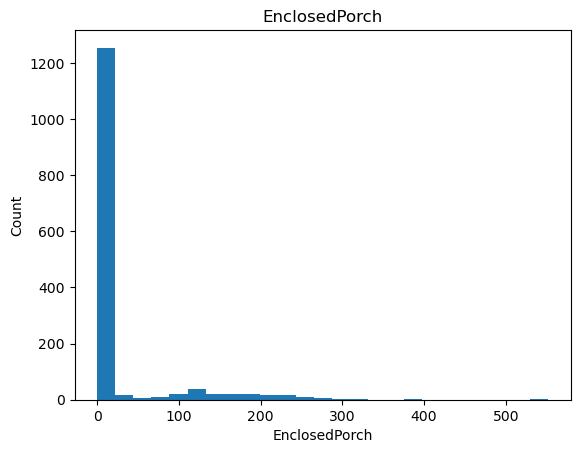

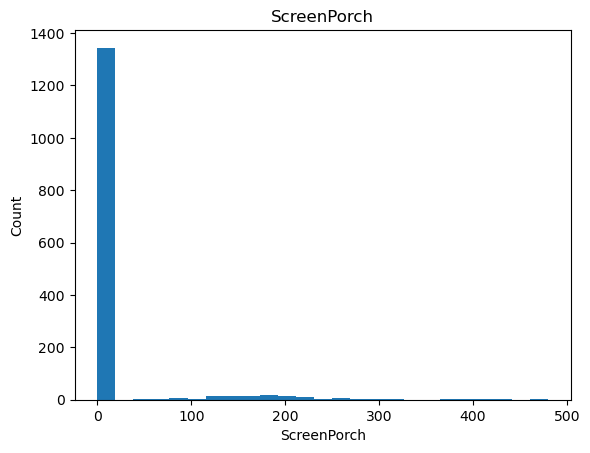

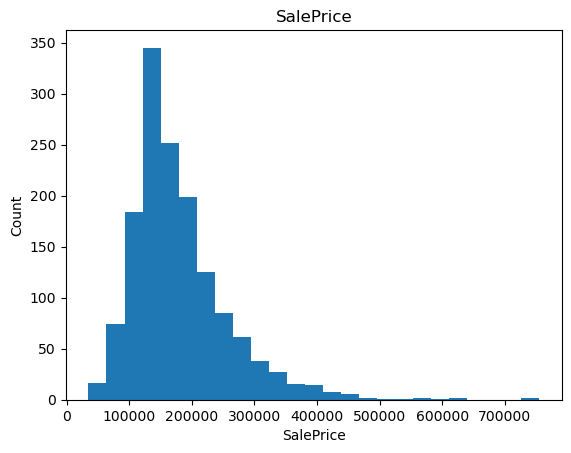

In [29]:
for col in conti_col:
    df1 = df2.copy()
    plt.hist(df1[col],bins=25)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

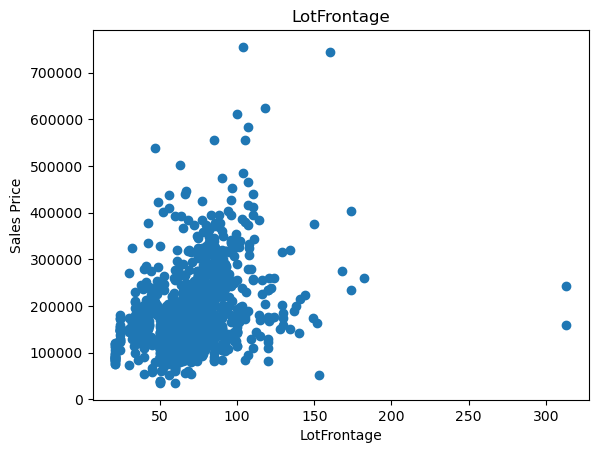

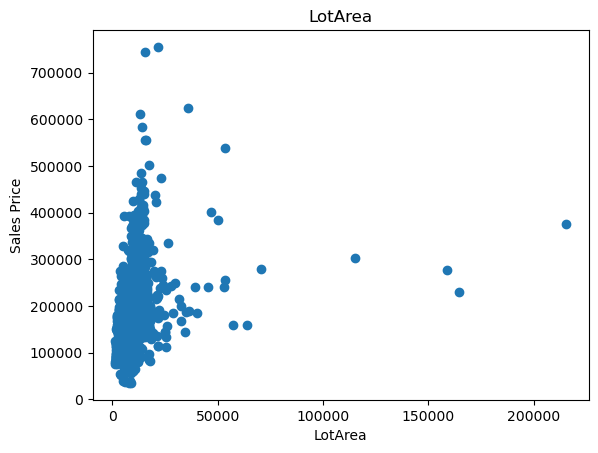

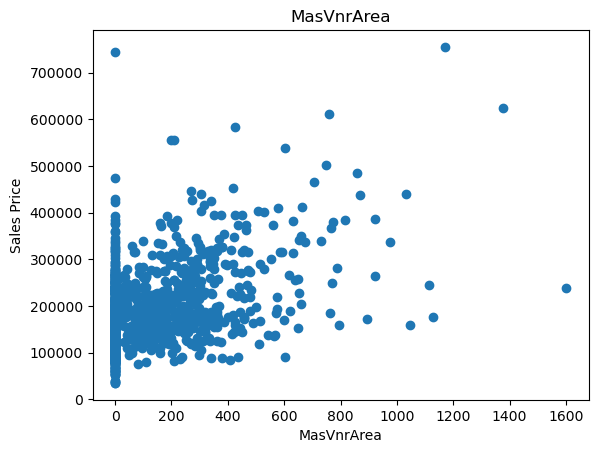

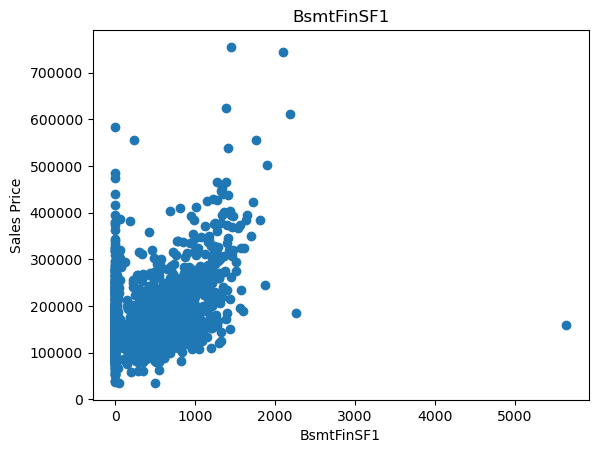

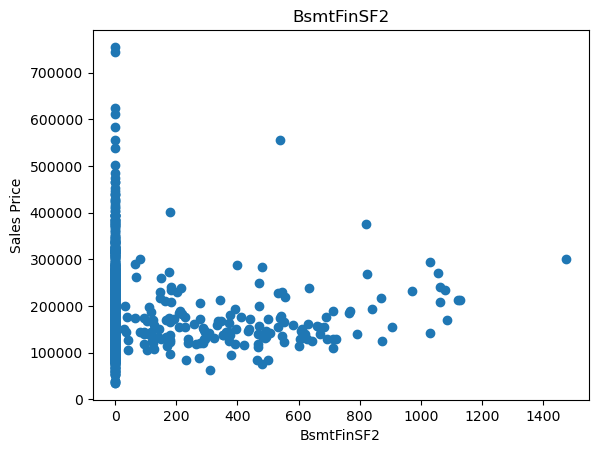

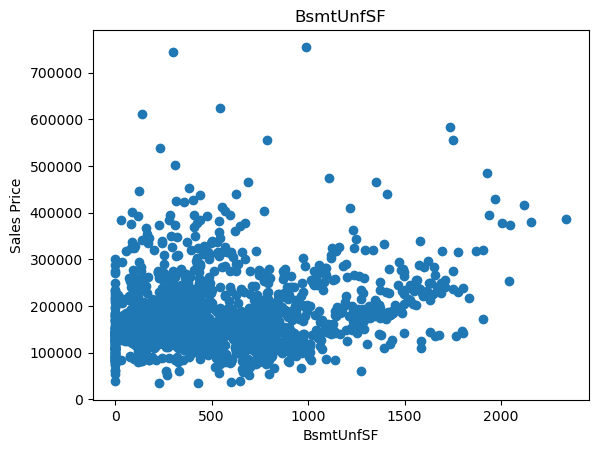

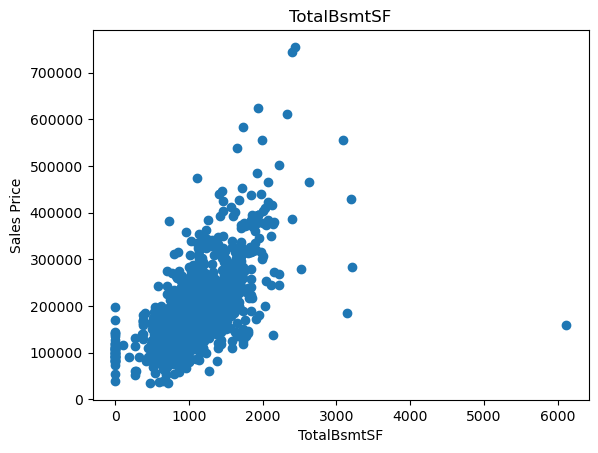

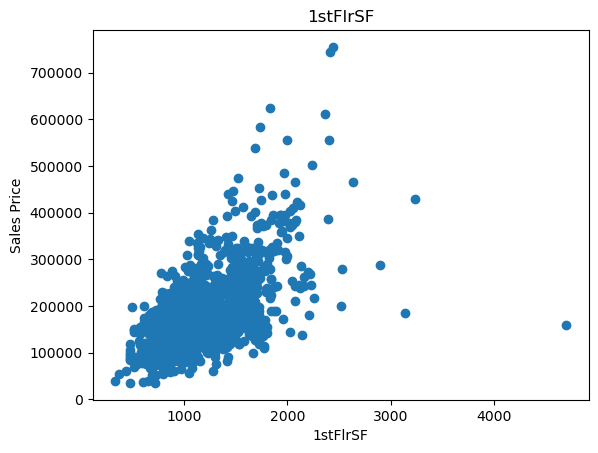

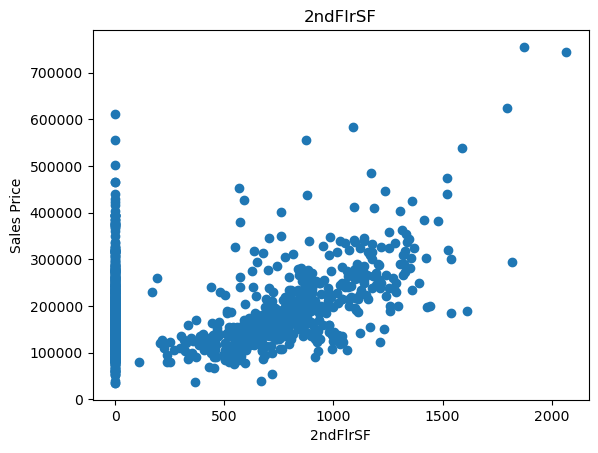

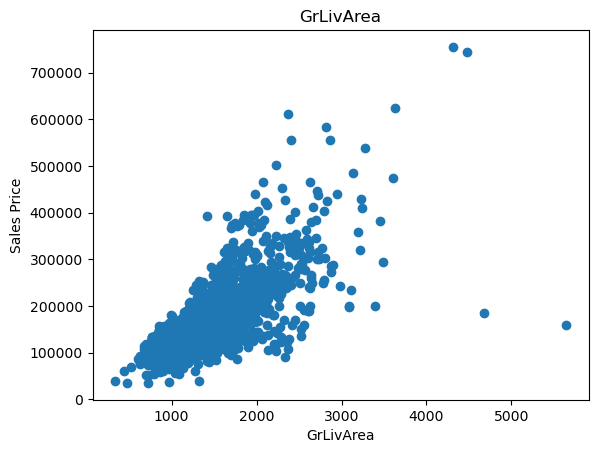

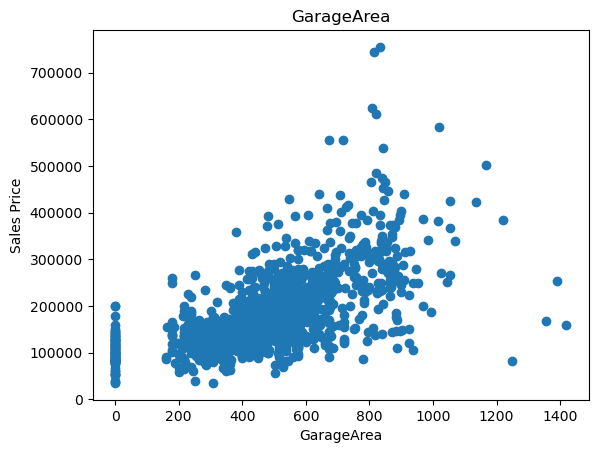

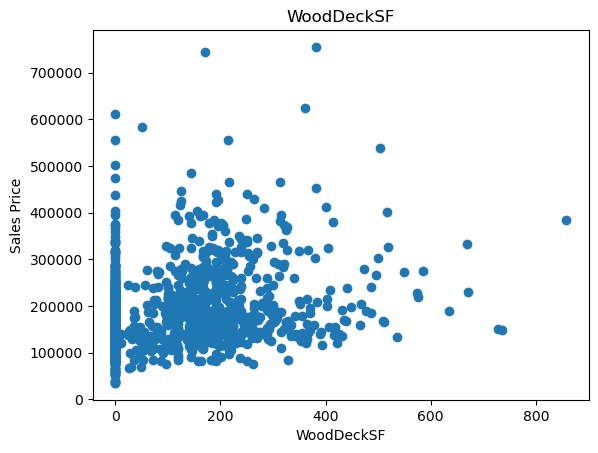

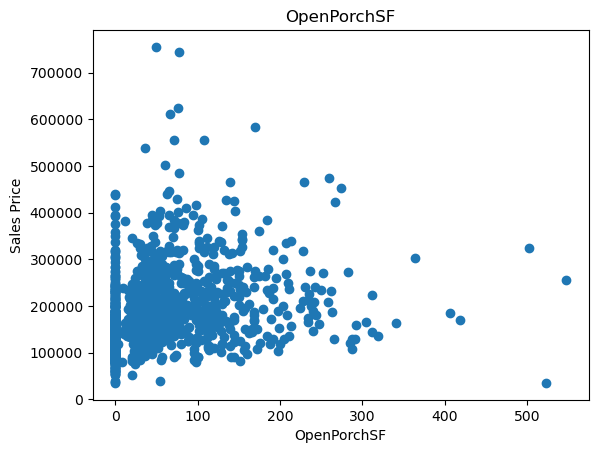

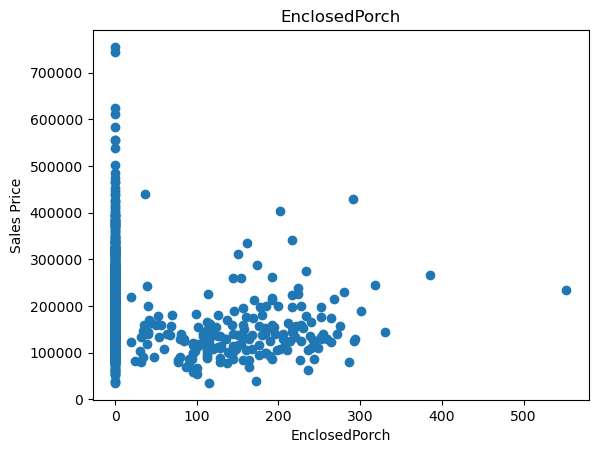

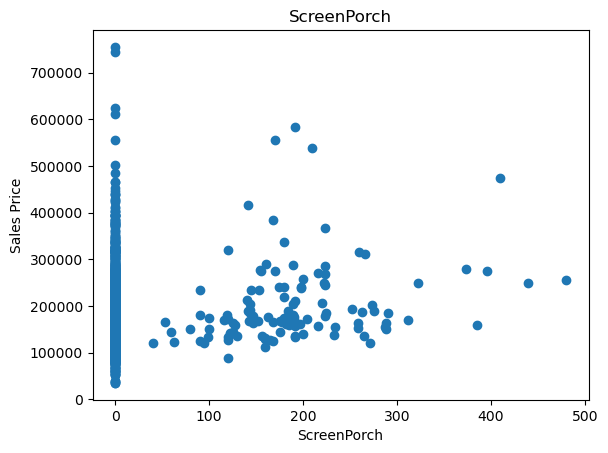

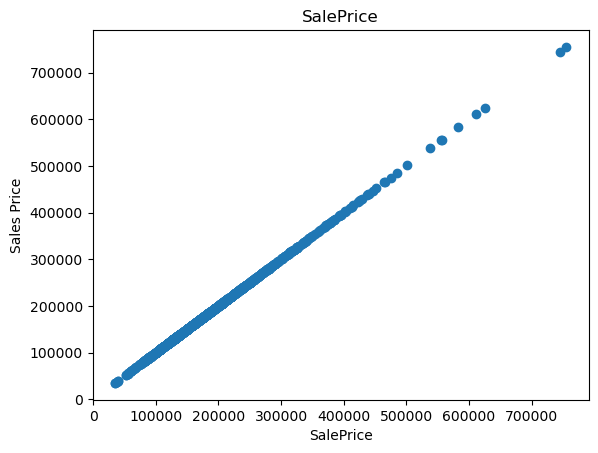

In [30]:
for col in conti_col:
    df1 = df2.copy()
    plt.scatter(df1[col],df1['SalePrice'])
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

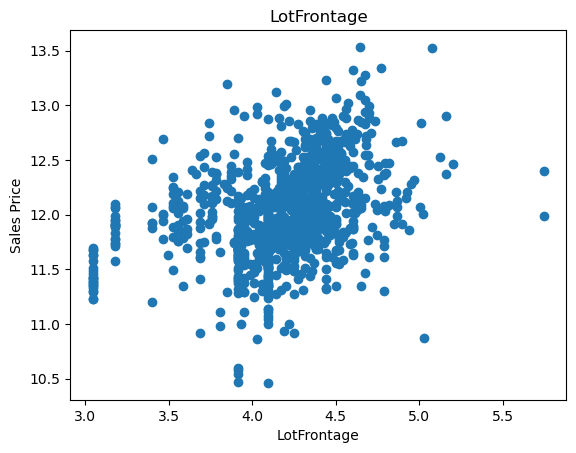

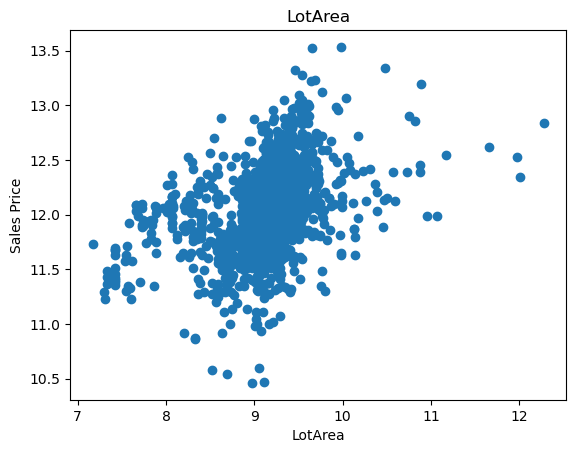

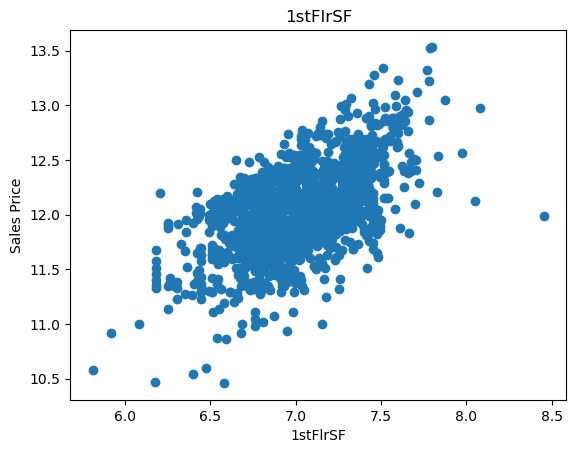

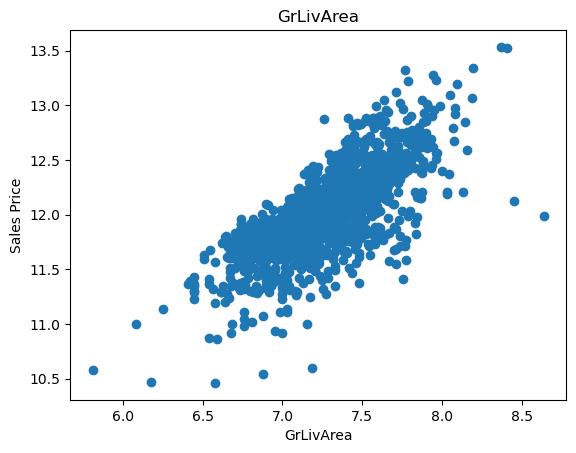

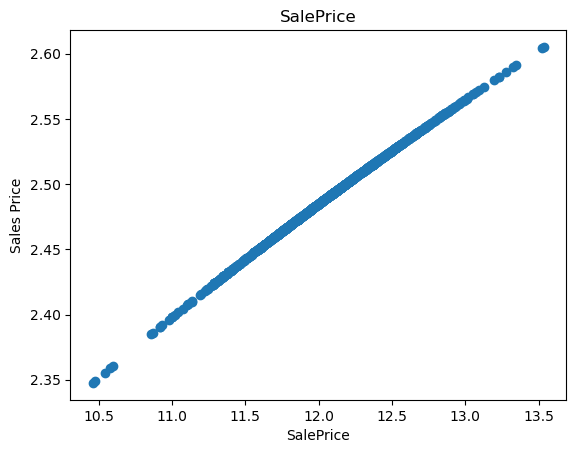

In [31]:
for col in conti_col:
    df1 = df2.copy()
    if 0 in df1[col].unique():
        pass
    else:
        df1[col] = np.log(df1[col])
        plt.scatter(df1[col],np.log(df1['SalePrice']))
        plt.ylabel('Sales Price')
        plt.xlabel(col)
        plt.title(col)
        plt.show()

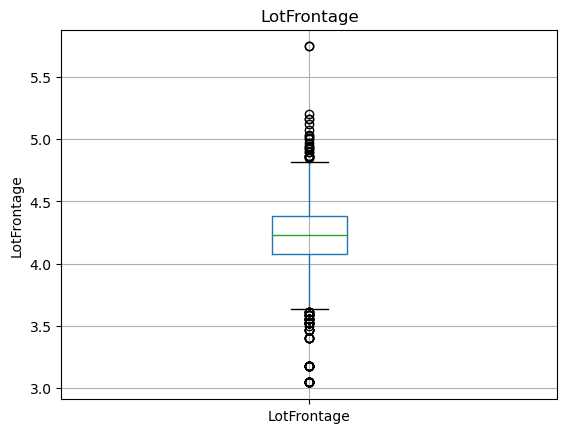

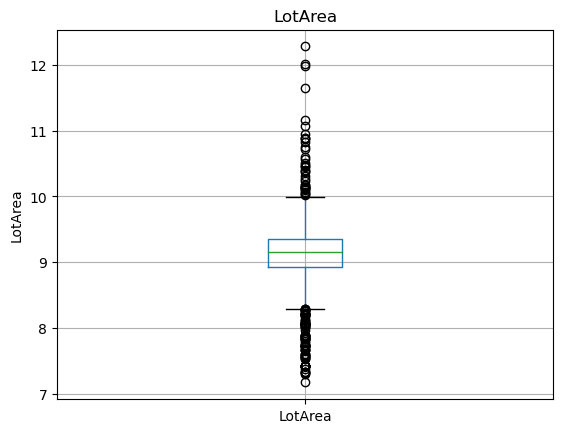

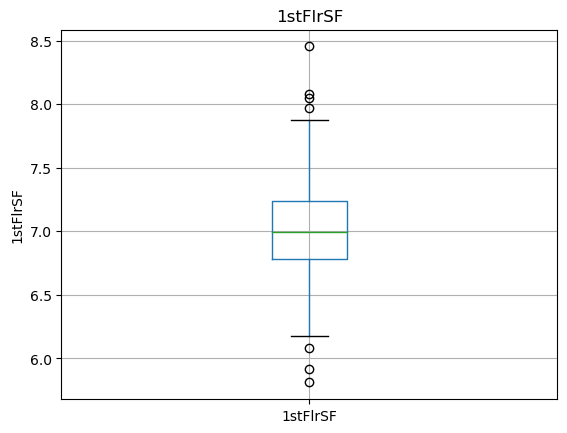

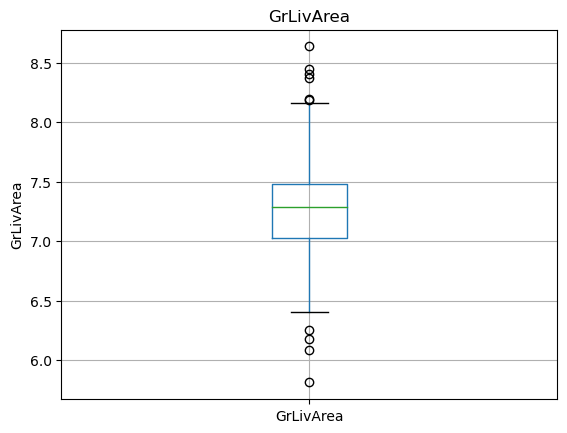

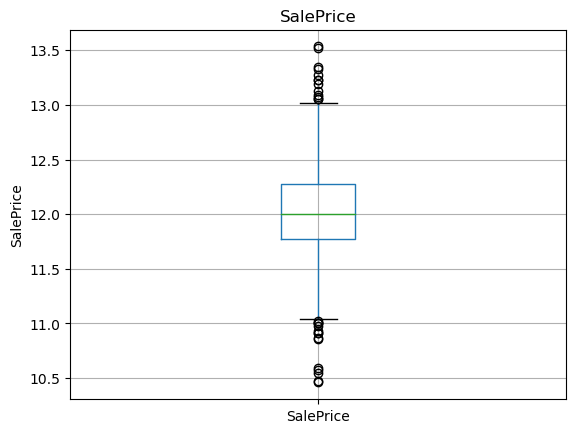

In [32]:
for col in conti_col:
    df1 = df2.copy()
    if 0 in df1[col].unique():
        pass
    else:
        df1[col] = np.log(df1[col])
        df1.boxplot(column=col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Categorical

In [33]:
categorical_col =[]
for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_col.append(col)
        
print(len(categorical_col))
print(categorical_col)


43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [34]:
df2[categorical_col].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu  GarageType  \
0          Y      SBrkr          Gd        Typ         NaN           0   
1          Y      SBrkr          TA        Typ          TA           0   
2          Y      SBrkr          Gd        Typ          TA           0   
3          Y      SBrkr          Gd        Typ          Gd           0   
4          Y      SBrkr          Gd        Typ          TA           0   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [35]:
for col in categorical_col:
    print("Column name",col,"their unique values",df[col].unique())
    print("length is",len(df[col].unique()))
    print("value counts",df[col].value_counts())
    print("value counts",df[col].value_counts(normalize=True))
    

Column name MSZoning their unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']
length is 5
value counts MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
value counts MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Column name Street their unique values ['Pave' 'Grvl']
length is 2
value counts Street
Pave    1454
Grvl       6
Name: count, dtype: int64
value counts Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
Column name Alley their unique values [nan 'Grvl' 'Pave']
length is 3
value counts Alley
Grvl    50
Pave    41
Name: count, dtype: int64
value counts Alley
Grvl    0.549451
Pave    0.450549
Name: proportion, dtype: float64
Column name LotShape their unique values ['Reg' 'IR1' 'IR2' 'IR3']
length is 4
value counts LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
value counts L

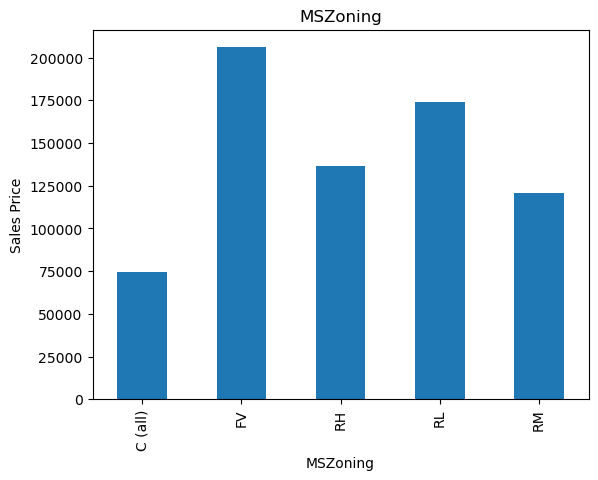

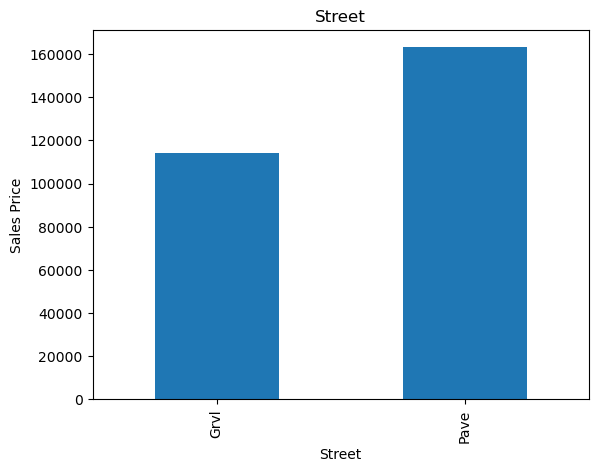

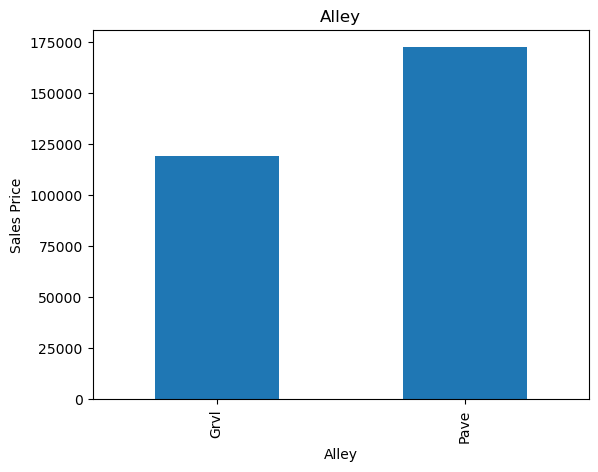

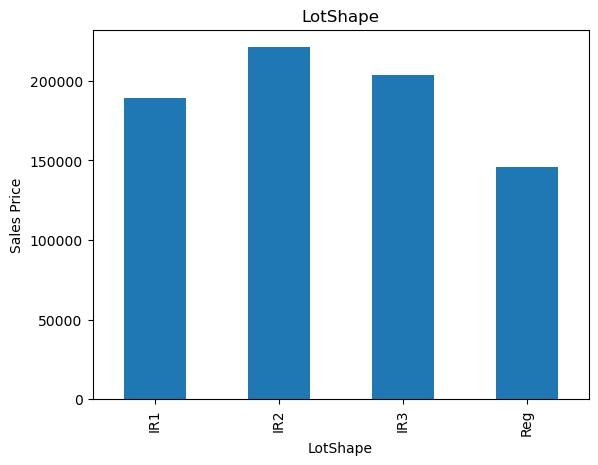

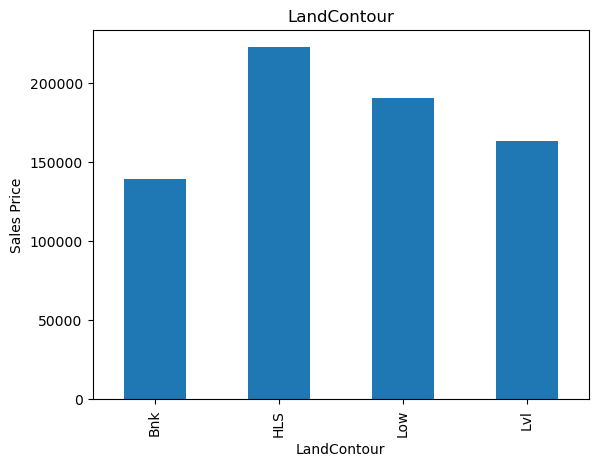

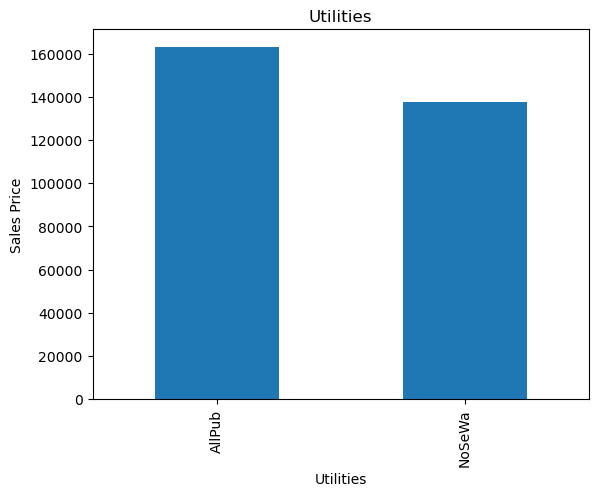

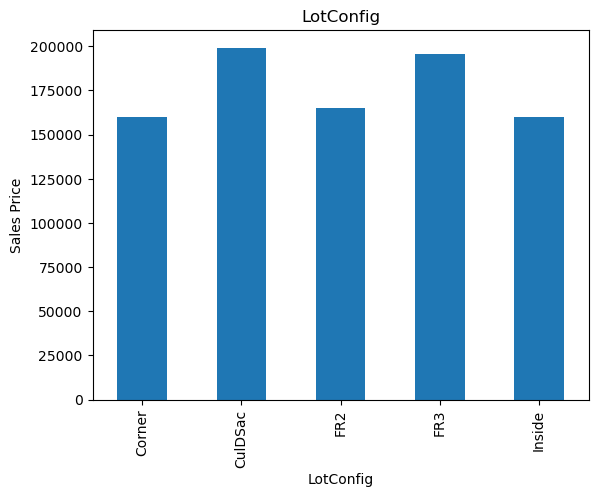

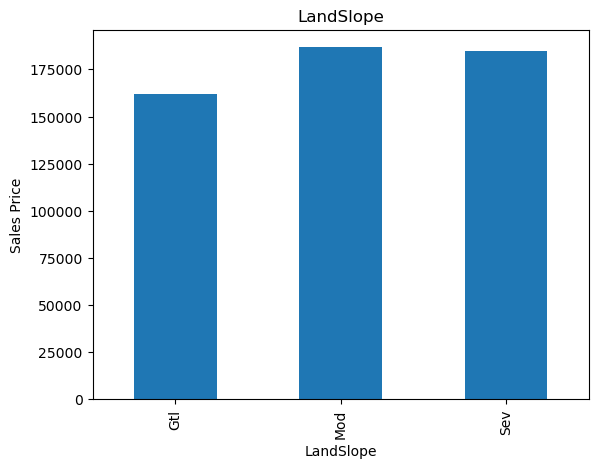

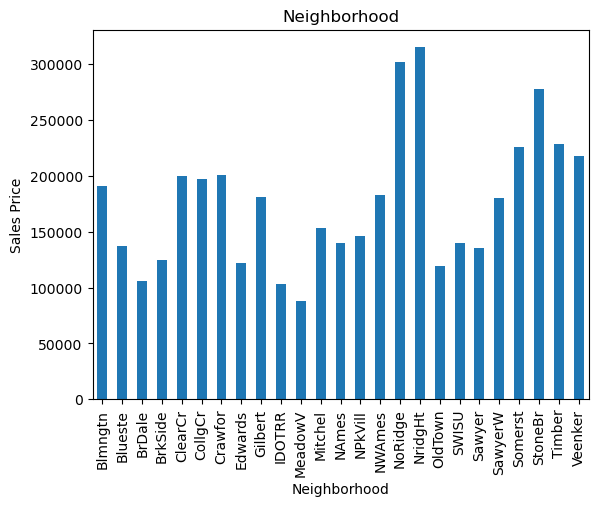

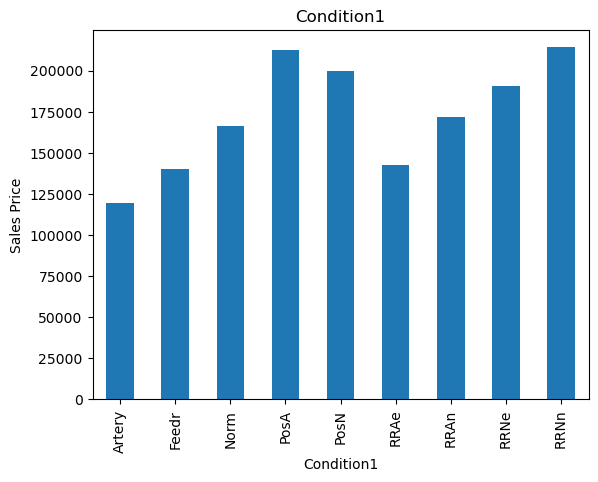

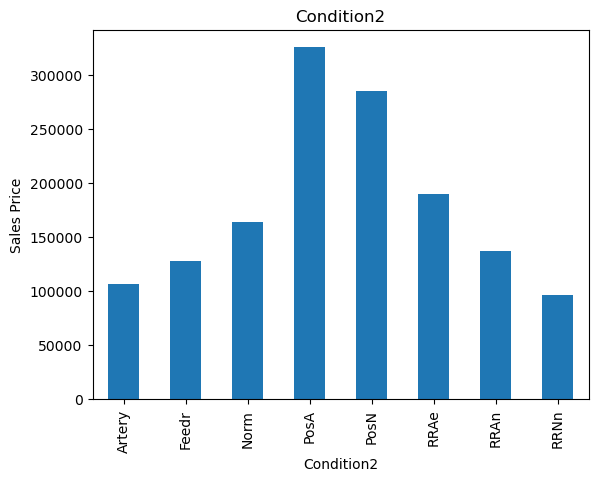

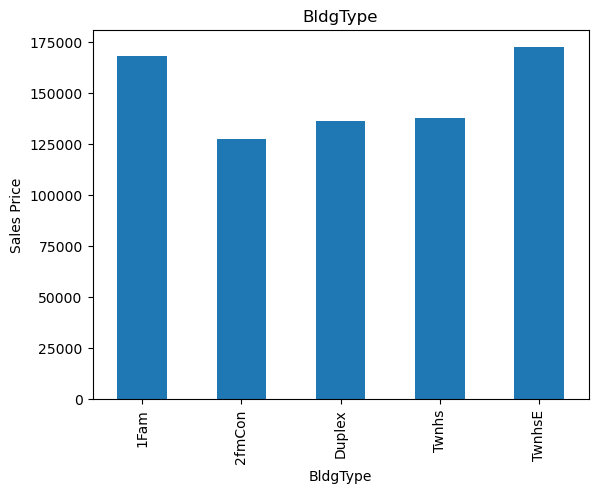

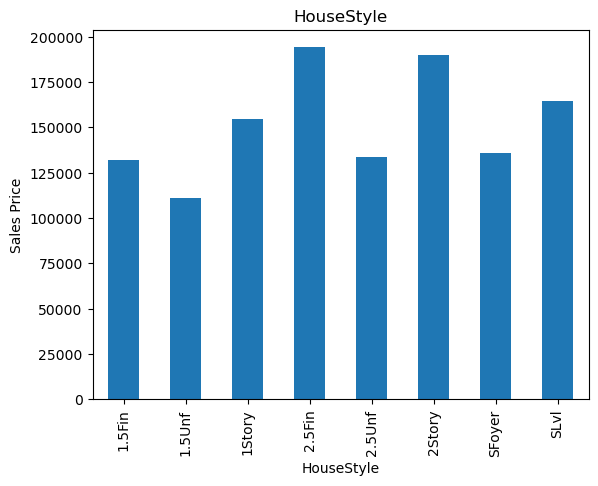

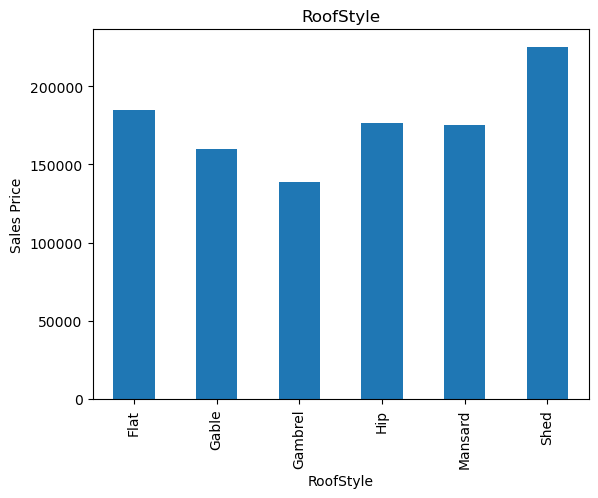

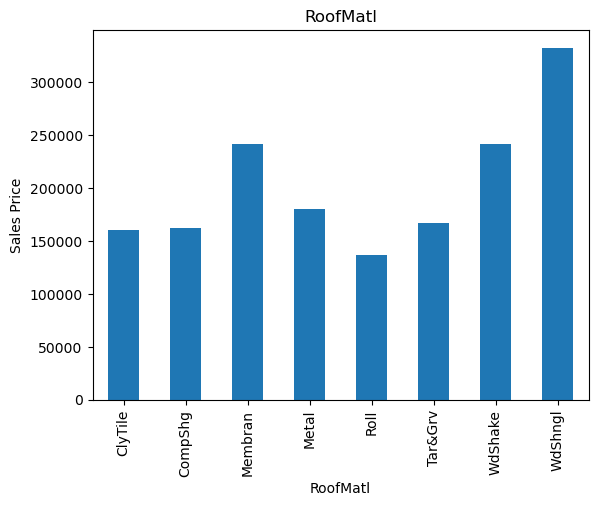

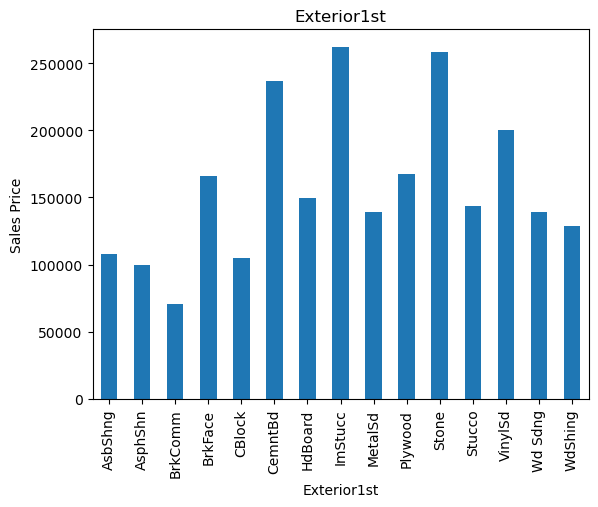

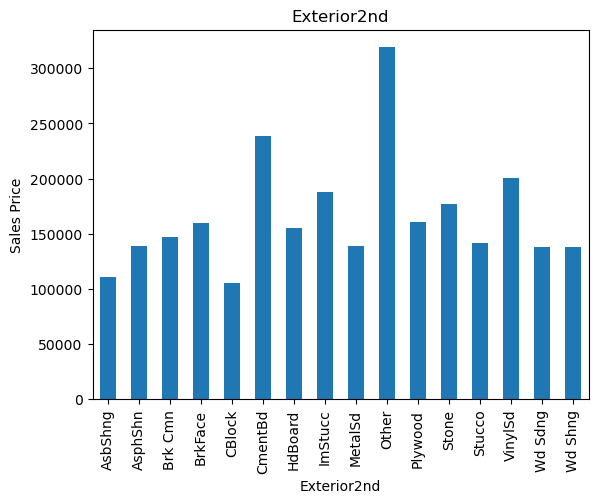

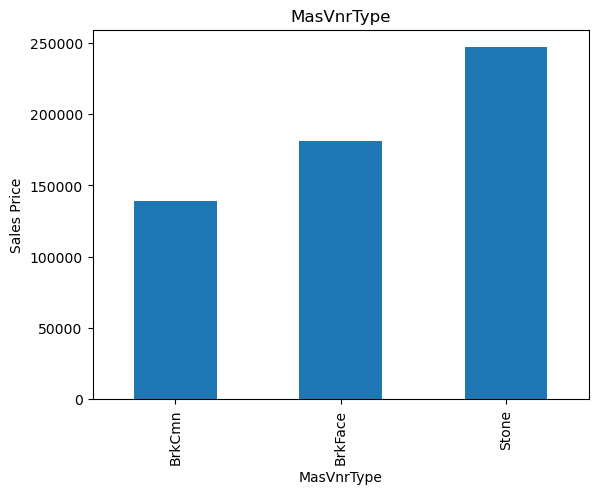

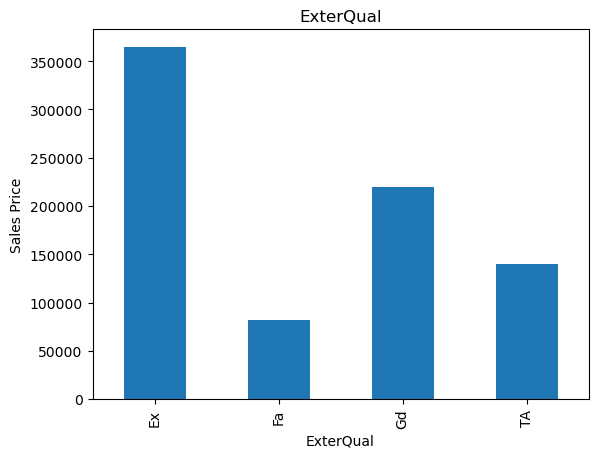

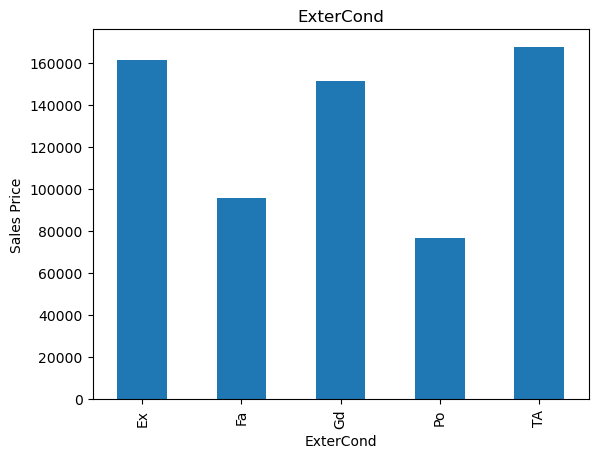

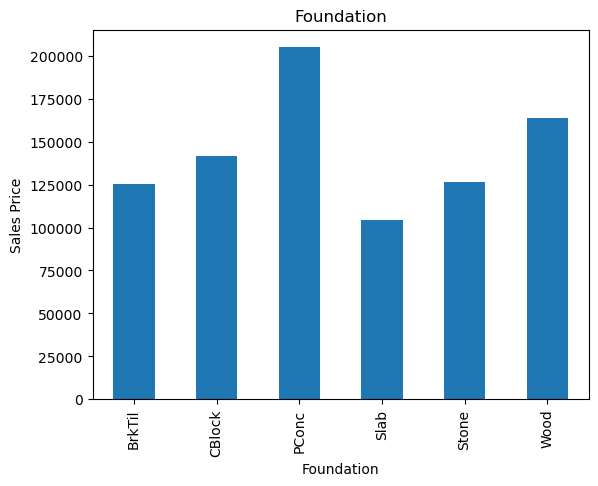

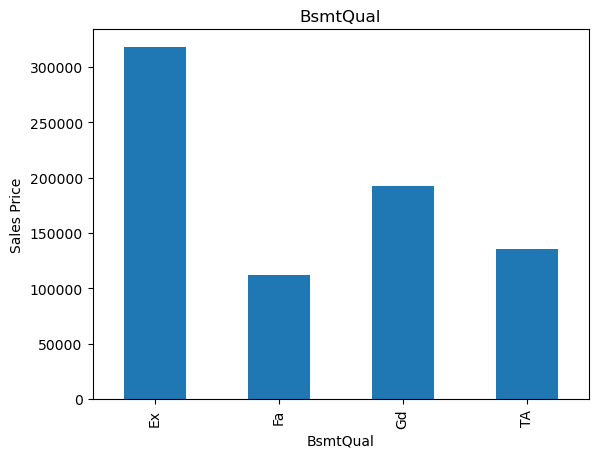

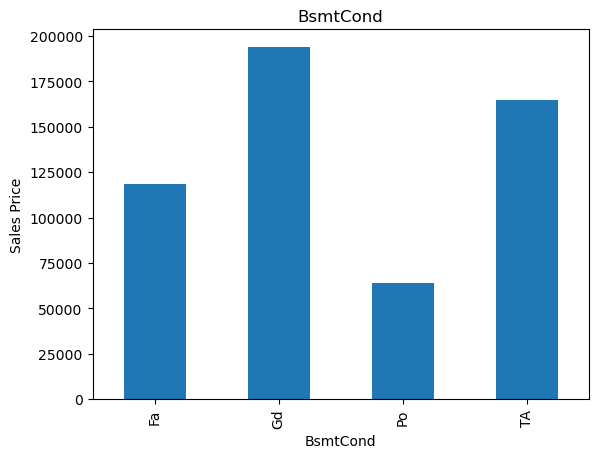

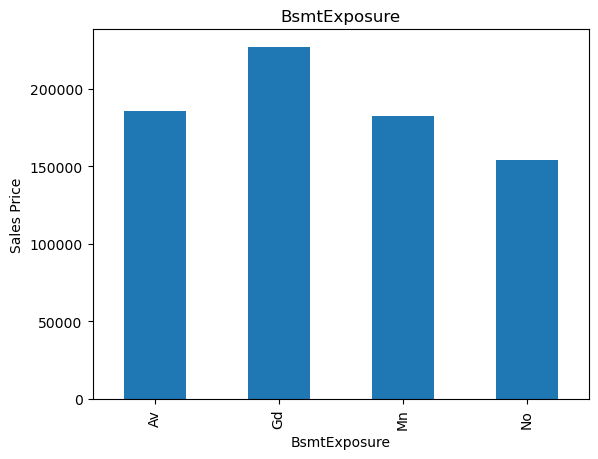

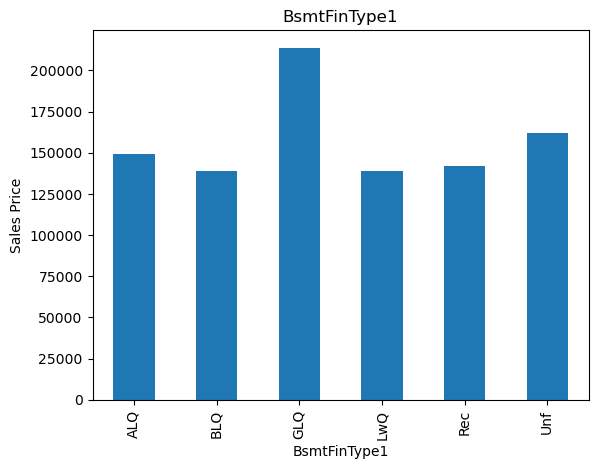

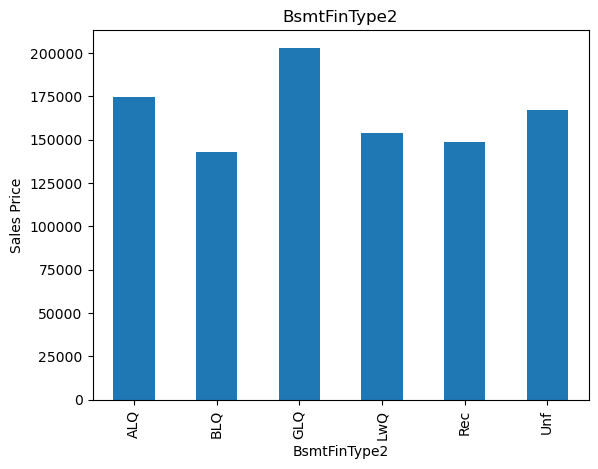

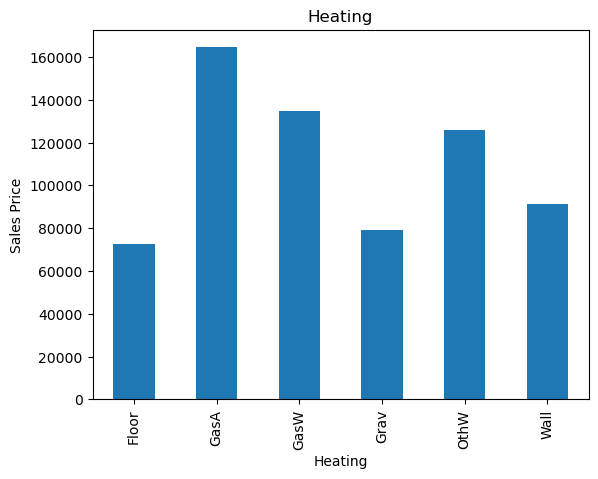

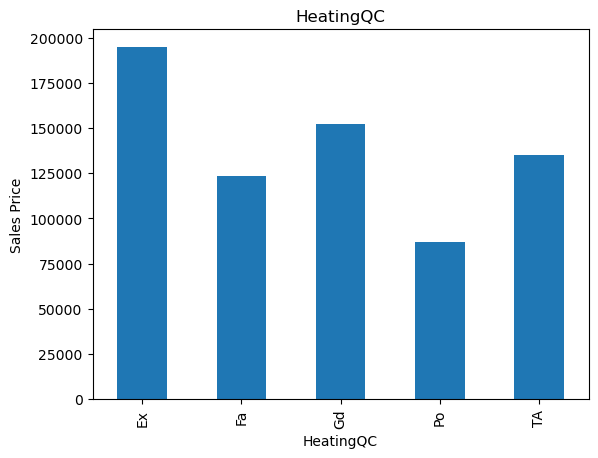

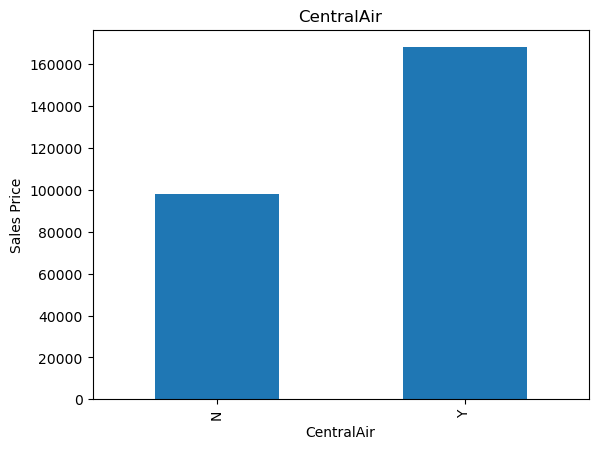

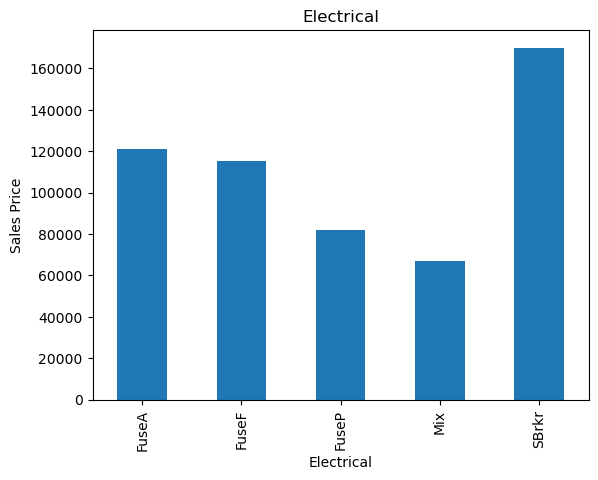

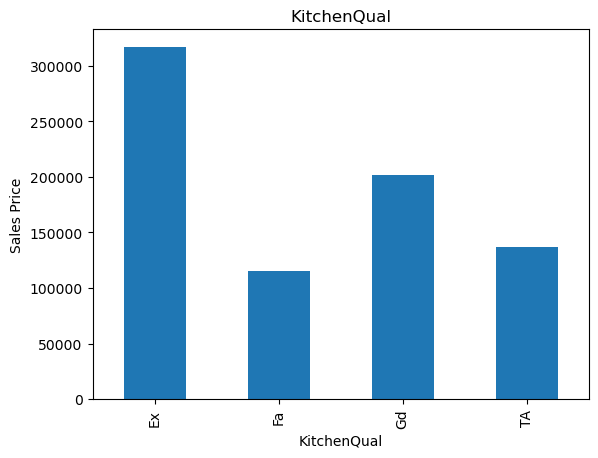

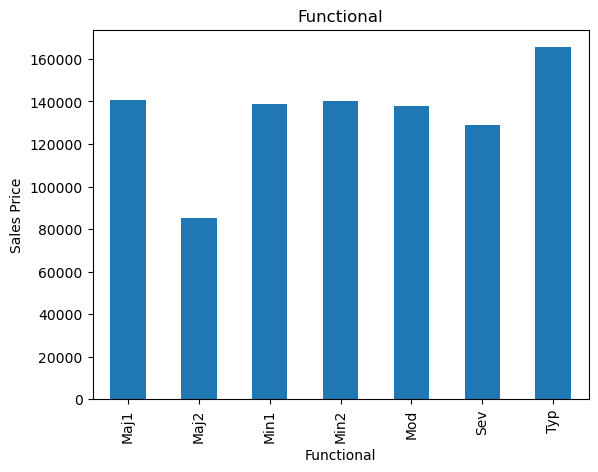

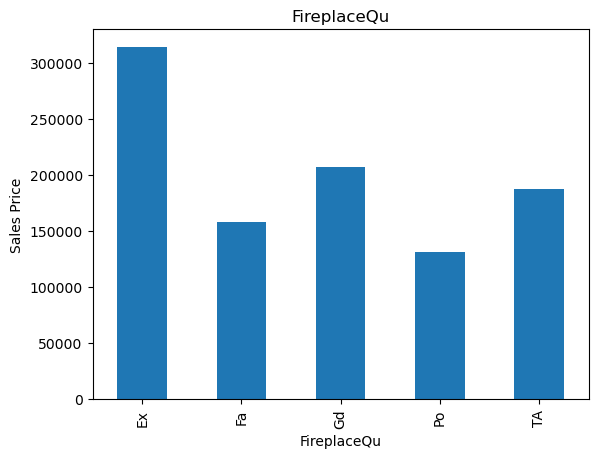

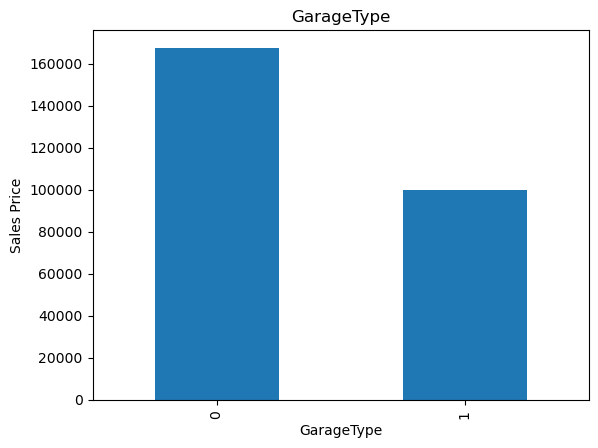

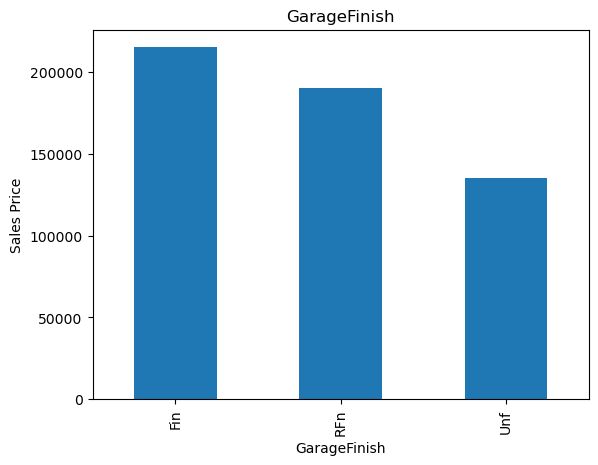

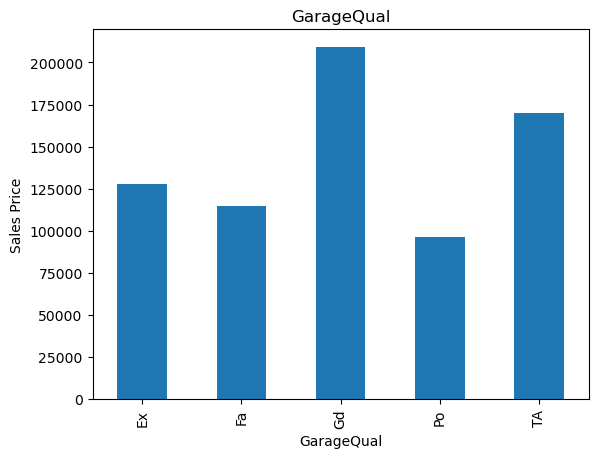

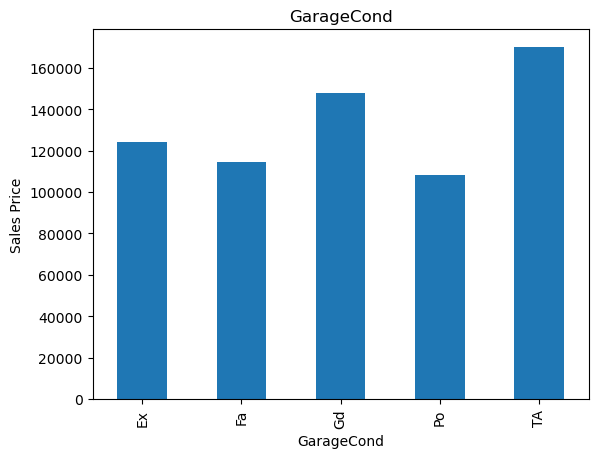

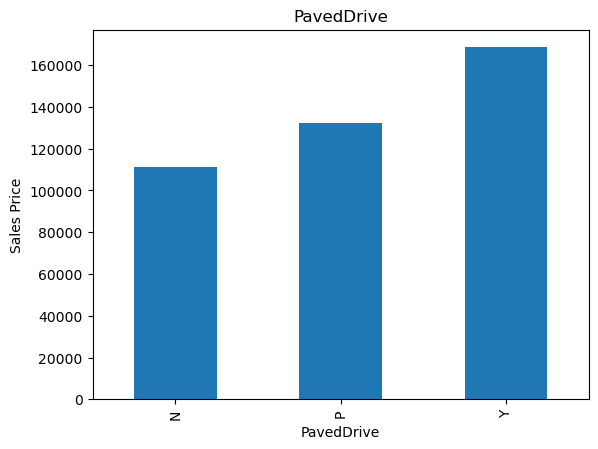

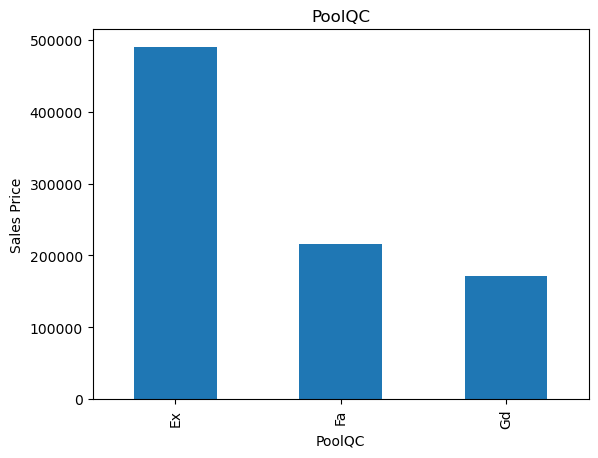

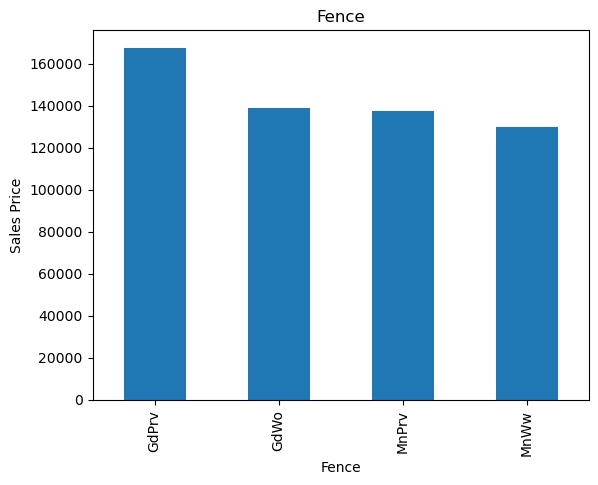

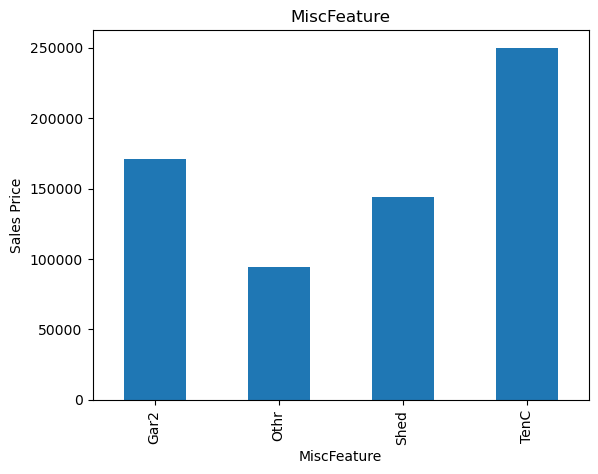

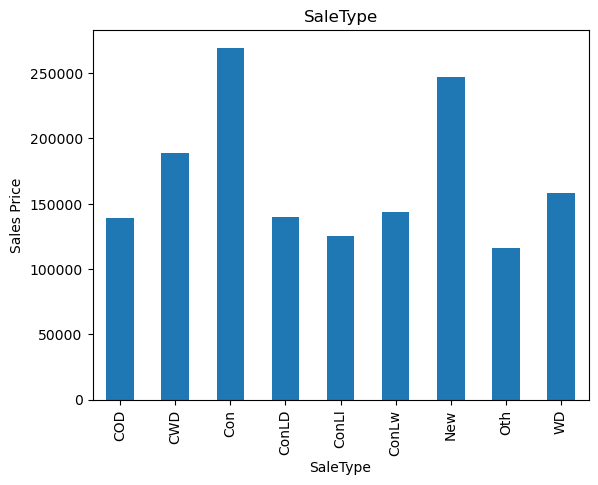

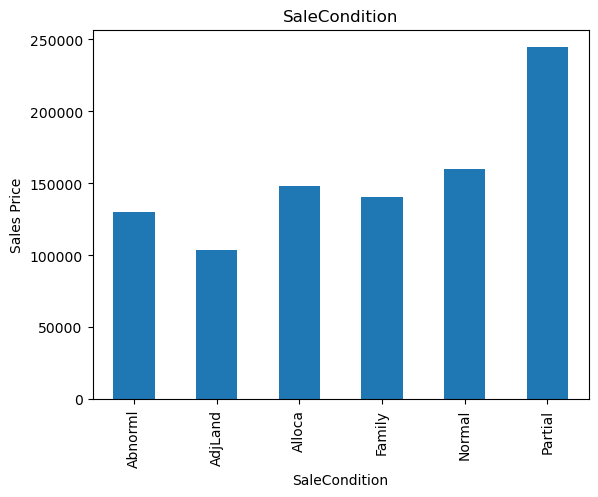

In [36]:
for col in categorical_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar()
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

# Feature Engineering

In [37]:
# always split - because of data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

In [38]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [39]:
y_train.shape, y_test.shape

((1314,), (146,))

# Categorical

In [40]:
for col in categorical_col:
    print("the coulmn", col,"null",df[col].isnull().sum())

the coulmn MSZoning null 0
the coulmn Street null 0
the coulmn Alley null 1369
the coulmn LotShape null 0
the coulmn LandContour null 0
the coulmn Utilities null 0
the coulmn LotConfig null 0
the coulmn LandSlope null 0
the coulmn Neighborhood null 0
the coulmn Condition1 null 0
the coulmn Condition2 null 0
the coulmn BldgType null 0
the coulmn HouseStyle null 0
the coulmn RoofStyle null 0
the coulmn RoofMatl null 0
the coulmn Exterior1st null 0
the coulmn Exterior2nd null 0
the coulmn MasVnrType null 872
the coulmn ExterQual null 0
the coulmn ExterCond null 0
the coulmn Foundation null 0
the coulmn BsmtQual null 37
the coulmn BsmtCond null 37
the coulmn BsmtExposure null 38
the coulmn BsmtFinType1 null 37
the coulmn BsmtFinType2 null 38
the coulmn Heating null 0
the coulmn HeatingQC null 0
the coulmn CentralAir null 0
the coulmn Electrical null 1
the coulmn KitchenQual null 0
the coulmn Functional null 0
the coulmn FireplaceQu null 690
the coulmn GarageType null 81
the coulmn GarageFi

In [41]:
for col in categorical_col:
    df[col] = df[col].fillna('Missing')
df[col].isnull().sum()

0

In [42]:
df.head(16)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL          NaN    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL          NaN    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL          NaN    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     2Story            9            5       2005   
12       Norm     1Fam     1Story            5            6       1962   
13       Norm     1Fam     1Story            7            5       2006   
14       Norm     1Fam     1Story            6            5       1960   
15       Norm     1Fam     1.5Unf            7            8       1929   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     Metal

# Numeric

In [43]:
numeric_null = []
for col in numeric_col:
    if df[col].isnull().sum() > 1:
        numeric_null.append(col)
        print("the coulmn", col,"null",df[col].isnull().sum())

the coulmn LotFrontage null 259
the coulmn MasVnrArea null 8
the coulmn GarageYrBlt null 81


In [44]:
for col in numeric_null:
    median1 = df[col].median()
    df[col] = df[col].fillna(median1)
    

In [45]:
df.head(16)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     2Story            9            5       2005   
12       Norm     1Fam     1Story            5            6       1962   
13       Norm     1Fam     1Story            7            5       2006   
14       Norm     1Fam     1Story            6            5       1960   
15       Norm     1Fam     1.5Unf            7            8       1929   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     Metal

# Year

In [46]:

for col in year_col:
    if col!='YrSold':
        df[col] = df['YrSold'] - df[col]



In [47]:
df.head(16)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
5        Norm     1Fam     1.5Fin            5            5         16   
6        Norm     1Fam     1Story            8            5          3   
7        Norm     1Fam     2Story            7            6         36   
8        Norm     1Fam     1.5Fin            7            5         77   
9      Artery   2fmCon     1.5Unf            5            6         69   
10       Norm     1Fam     1Story            5            5         43   
11       Norm     1Fam     2Story            9            5          1   
12       Norm     1Fam     1Story            5            6         46   
13       Norm     1Fam     1Story            7            5          1   
14       Norm     1Fam     1Story            6            5         48   
15       Norm     1Fam     1.5Unf            7            8         78   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  CompShg     Metal

In [48]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

# Numerical

In [49]:
#continuos

for col in conti_col:
    df1 = df2.copy()
    if 0 in df1[col].unique():
        pass
    else:
        df[col] = np.log(df[col])
        print(col)

LotFrontage
LotArea
1stFlrSF
GrLivArea
SalePrice


In [50]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

# categorical

In [51]:
len(categorical_col)
print(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [53]:
for col in categorical_col:
    counts = df[col].value_counts(normalize=True)
    rare_categories = counts[counts <= 0.01].index
    df[col] = np.where(df[col].isin(rare_categories), 'Rare', df[col])


In [54]:
df.head(16)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1    2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2    3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3    4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4    5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
5    6          50       RL     4.442651  9.554993   Pave  Missing      IR1   
6    7          20       RL     4.317488  9.218705   Pave  Missing      Reg   
7    8          60       RL     4.234107  9.247829   Pave  Missing      IR1   
8    9          50       RM     3.931826  8.719317   Pave  Missing      Reg   
9   10         190       RL     3.912023  8.911934   Pave  Missing      Reg   
10  11          20       RL     4.248495  9.323669   Pave  Missing      Reg   
11  12          60       RL     4.442651  9.386308   Pave  Missing      IR1   
12  13          20       RL     4.234107  9.470240   Pave  Missing      IR2   
13  14          20       RL     4.510860  9.273503   Pave  Missing      IR1   
14  15          20       RL     4.234107  9.298351   Pave  Missing      IR1   
15  16          45       RM     3.931826  8.719317   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl         Rare      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
5        Norm     1Fam     1.5Fin            5            5         16   
6        Norm     1Fam     1Story            8            5          3   
7        Norm     1Fam     2Story            7            6         36   
8        Norm     1Fam     1.5Fin            7            5         77   
9        Rare   2fmCon       Rare            5            6         69   
10       Norm     1Fam     1Story            5            5         43   
11       Norm     1Fam     2Story            9            5          1   
12       Norm     1Fam     1Story            5            6         46   
13       Norm     1Fam     1Story            7            5          1   
14       Norm     1Fam     1Story            6            5         48   
15       Norm     1Fam       Rare            7            8         78   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  

In [55]:
for col in categorical_col:
    print("Column name",col,"their unique values",df[col].unique())
    print("length is",len(df[col].unique()))
  #  print("value counts",df[col].value_counts())
   # print("value counts",df[col].value_counts(normalize=True))
    

Column name MSZoning their unique values ['RL' 'RM' 'Rare' 'FV' 'RH']
length is 5
Column name Street their unique values ['Pave' 'Rare']
length is 2
Column name Alley their unique values ['Missing' 'Grvl' 'Pave']
length is 3
Column name LotShape their unique values ['Reg' 'IR1' 'IR2' 'Rare']
length is 4
Column name LandContour their unique values ['Lvl' 'Bnk' 'Low' 'HLS']
length is 4
Column name Utilities their unique values ['AllPub' 'Rare']
length is 2
Column name LotConfig their unique values ['Inside' 'FR2' 'Corner' 'CulDSac' 'Rare']
length is 5
Column name LandSlope their unique values ['Gtl' 'Mod' 'Rare']
length is 3
Column name Neighborhood their unique values ['CollgCr' 'Rare' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Blmngtn'
 'BrDale' 'SWISU']
length is 23
Column name Condition1 their unique values ['Norm' 'Feedr' 'PosN' 'Artery' 'Rare' 'RRAn'

In [56]:
for col in categorical_col:
    labels_ordered=df.groupby([col])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[col]=df[col].map(labels_ordered)

In [57]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [58]:
df.shape

(1460, 81)

In [59]:
scale_col = []
for col in df.columns:
    if col not in ['Id','SalePrice']:
        scale_col.append(col)
print(type(scale_col))

<class 'list'>


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scale_col])

MinMaxScaler()

In [61]:
scaler.transform(df[scale_col])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.66666667,
        0.75      ]])

In [ ]:
df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)